In [1]:
# Importar as bibliotecas necessárias

# Bibliotecas de manipulação de dados e analise

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Bibliotecas de gráfico

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Bibliotecas de previsões

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pré-Processamento de dados

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Ignorar aviso de erros

import warnings
warnings.filterwarnings('ignore')


# Carregar e verificar os dados

In [2]:
# Carregar o arquivo csv

df = pd.read_csv('/workspaces/Acidente_Vascular-Cerebral/healthcare-dataset-stroke-data.csv')

In [3]:
# Visualizar as 5 primeiras linhas do arquivo

df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Informação sobre o Dataset

* id: identificador exclusivo
* gender: "Male", "Female" or "Other" ("Masculino", "Feminino" ou "Outro")
* age: idade do paciente
* hypertension: 0 e o paciente não tem hipertensão, 1 se o paciente tem hipertensão
* heart_disease: 0 se o paciente não tem nenhuma doença cardíaca, 1 se o paciente tem uma doença cardíaca
* ever_married: "No" or "Yes" ( É casado = "Sim" ou "Não"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Tipo de Trabalho = "Criança", "Trabalho Governamental", "Nunca Trabalhou", "Particular" ou "Autônomo")
* Residence_type: "Rural" ou "Urbano
* avg_glucose_level: nível médio de glicose no sangue
* bmi: índice de massa corporal
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* ("fumou antigamente", "nunca fumou", "fuma" ou "desconhecido")
* stroke: 1 se o paciente teve um AVC ou 0 se não *Note: "Unknown" em smoking_status significa que a informação não está disponível para este paciente

In [4]:
# Visualizar as 5 últimas linhas do arquivo

df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
# Verificar os tipos de dados

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
# Verificar mais informações

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Verificar o tamanho do dataframe

df.shape

(5110, 12)

In [8]:
linhas = df.shape[0]
colunas = df.shape[1]

print(f'Quantidades de linhas : {linhas} e quantidades de colunas : {colunas}')

Quantidades de linhas : 5110 e quantidades de colunas : 12


In [9]:
# Verificar a estatísticas descritivas

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
# Verificar a estatísticas categóricas

df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
# Verificar todas as estatísticas juntas

df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Separando as variáveis do conjunto de dados

As variáveis podem ser classificadas em quatro tipos principais: qualitativas nominais, qualitativas ordinais, quantitativas contínuas e quantitativas discretas. A diferença entre eles está relacionada à natureza dos dados que essas variáveis representam. Vamos entender cada um desses tipos:

1. Variáveis Qualitativas Nominais:
   As variáveis qualitativas nominais representam atributos ou categorias que não possuem uma ordem específica. Elas descrevem características ou qualidades distintas, mas não possuem uma escala numérica associada. Exemplos de variáveis qualitativas nominais são: gênero (masculino, feminino), cor dos olhos (azul, castanho, verde), estado civil (solteiro, casado, divorciado) etc. Nesse tipo de variável, a única informação relevante é a categoria em que cada observação se enquadra.

2. Variáveis Qualitativas Ordinais:
   As variáveis qualitativas ordinais também representam atributos ou categorias, mas, ao contrário das variáveis nominais, possuem uma ordem ou hierarquia entre as categorias. Nesse caso, a escala é categórica e ordenada. Exemplos de variáveis qualitativas ordinais são: nível de satisfação (baixo, médio, alto), grau de educação (fundamental, médio, superior), classificação de dor (nenhuma dor, leve, moderada, intensa) etc. Nesse tipo de variável, a ordem entre as categorias é relevante, mas a diferença entre as categorias não é quantificável.

3. Variáveis Quantitativas Contínuas:
   As variáveis quantitativas contínuas representam valores numéricos que podem assumir uma infinidade de valores dentro de um intervalo contínuo. Elas são medidas em uma escala numérica e podem ter precisão arbitrária. Exemplos de variáveis quantitativas contínuas são: altura (por exemplo, 1,75 metros), peso (por exemplo, 70,2 kg), temperatura (por exemplo, 25,5 °C) etc. Nesse tipo de variável, é possível fazer medições precisas e realizar operações matemáticas, como soma, subtração, multiplicação e divisão.

4. Variáveis Quantitativas Discretas:
   As variáveis quantitativas discretas também representam valores numéricos, mas eles são contáveis e geralmente são números inteiros. As observações nessas variáveis são contadas ou enumeradas, e não podem assumir valores entre as unidades contadas. Exemplos de variáveis quantitativas discretas são: número de filhos (por exemplo, 0, 1, 2), quantidade de produtos vendidos (por exemplo, 5, 10, 15), número de acidentes em um mês etc. Nesse tipo de variável, as operações matemáticas geralmente têm um significado limitado, pois não é possível calcular frações ou porcentagens exatas entre as unidades contadas.

Essas são as principais diferenças entre os tipos de variáveis. É importante compreender a natureza das variáveis em uma análise estatística, pois isso influencia as técnicas e os métodos utilizados para analisar e interpretar os dados cor

retamente.

In [13]:
var_qualitativas = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
var_quantitativas = ['age', 'avg_glucose_level', 'bmi'] 

In [14]:
# Verificar a quantidade única por coluna

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# Limpeza dos dados

In [15]:
# Vamos realizar a copia do DataFrame antes de modificar

df1 = df.copy(deep=True)

In [16]:
# Verificando a copia do DataFrame

df1.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
# Visualizando todas as colunas

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [18]:
# Verificar a quantidade de dados nulos

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# Verificar a quantidade de dados nulos

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# Apagando os dados ausentes e aplicando no próprio DF

df.dropna(inplace= True)

In [21]:
# Verificar a quantidade de dados nulos

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [23]:
# Identificar valores duplicados

# Selecione todas as linhas duplicadas com base em todas as colunas

df[df.duplicated(keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [24]:
# Selecione todas as linhas duplicadas com base na coluna selecionada

df[df.duplicated(subset=['id'],keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Vamos remover uma coluna chamada 'id' de um DataFrame 'df', pois não é necessário para analise.

Vou explicar os diferentes componentes do código:

* 'df' é o nome do DataFrame em que a operação será realizada.

* 'drop' é uma função que remove elementos de um DataFrame. Nesse caso, está sendo utilizada para remover uma coluna específica.

* ['id'] é uma lista que contém o nome da coluna que será removida. No caso, a coluna chamada 'id' será excluída.

* 'axis=1' indica que a operação deve ser realizada ao longo do eixo das colunas. Isso significa que a função 'drop' irá remover a coluna especificada em cada linha do DataFrame.

* 'inplace=True' indica que a operação deve ser realizada diretamente no DataFrame 'df', ou seja, o DataFrame será modificado permanentemente. Se 'inplace=False' (ou omitido), uma cópia modificada do DataFrame seria retornada, e o DataFrame original não seria alterado.

Portanto, o código remove a coluna 'id' do DataFrame 'df' de forma permanente.

In [25]:
df.drop(['id'], axis = 1, inplace = True)

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [27]:
# Verificar mais informações após apagar a coluna

df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


# Analisar as variáveis

In [28]:
var_qualitativas

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [44]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

Explicação dos diferentes componentes do código:

* plt.figure(figsize=(15, 6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

* sns.countplot(data=df, x='gender', palette='hls') cria o gráfico de contagem. Ele usa a função countplot do Seaborn para contar e exibir o número de ocorrências para cada categoria da coluna 'gender' do DataFrame 'df'. 
* O parâmetro data=df especifica que o DataFrame 'df' contém os dados a serem usados. 
* O parâmetro x='gender' define que a coluna 'gender' será exibida no eixo x (horizontal). 
* O parâmetro palette='hls' define a paleta de cores a ser usada no gráfico.

* plt.xticks(rotation=90) gira os rótulos dos ticks (marcas) do eixo x em 90 graus. Isso é útil quando os rótulos são longos ou quando há muitas categorias no eixo x, permitindo uma melhor legibilidade dos rótulos.

* plt.show() exibe o gráfico na saída.

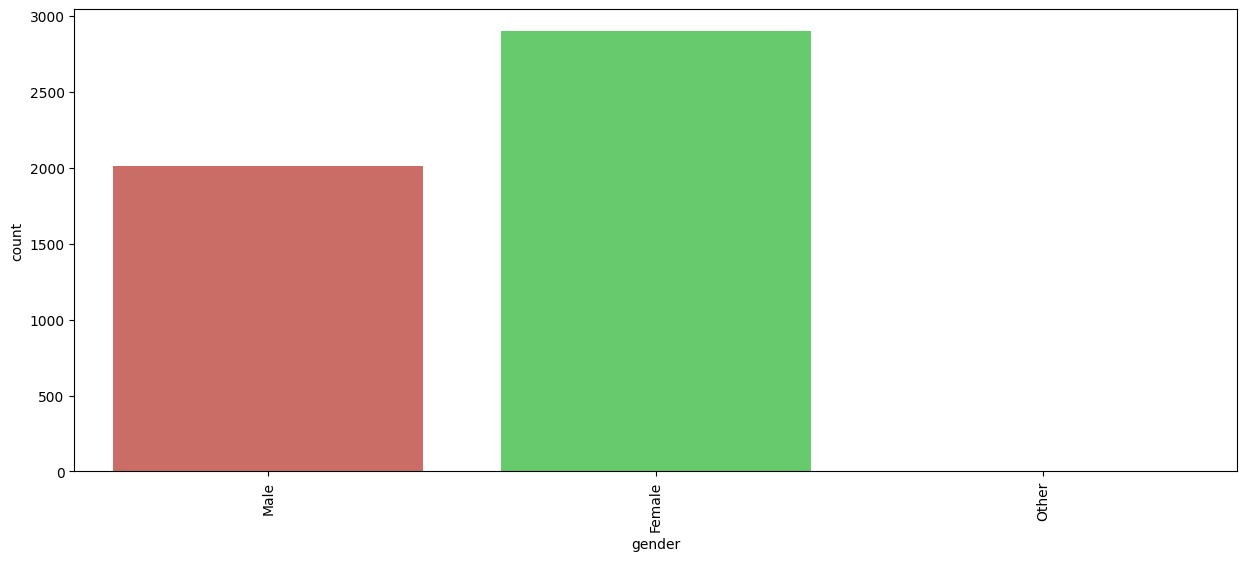

In [47]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'gender',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

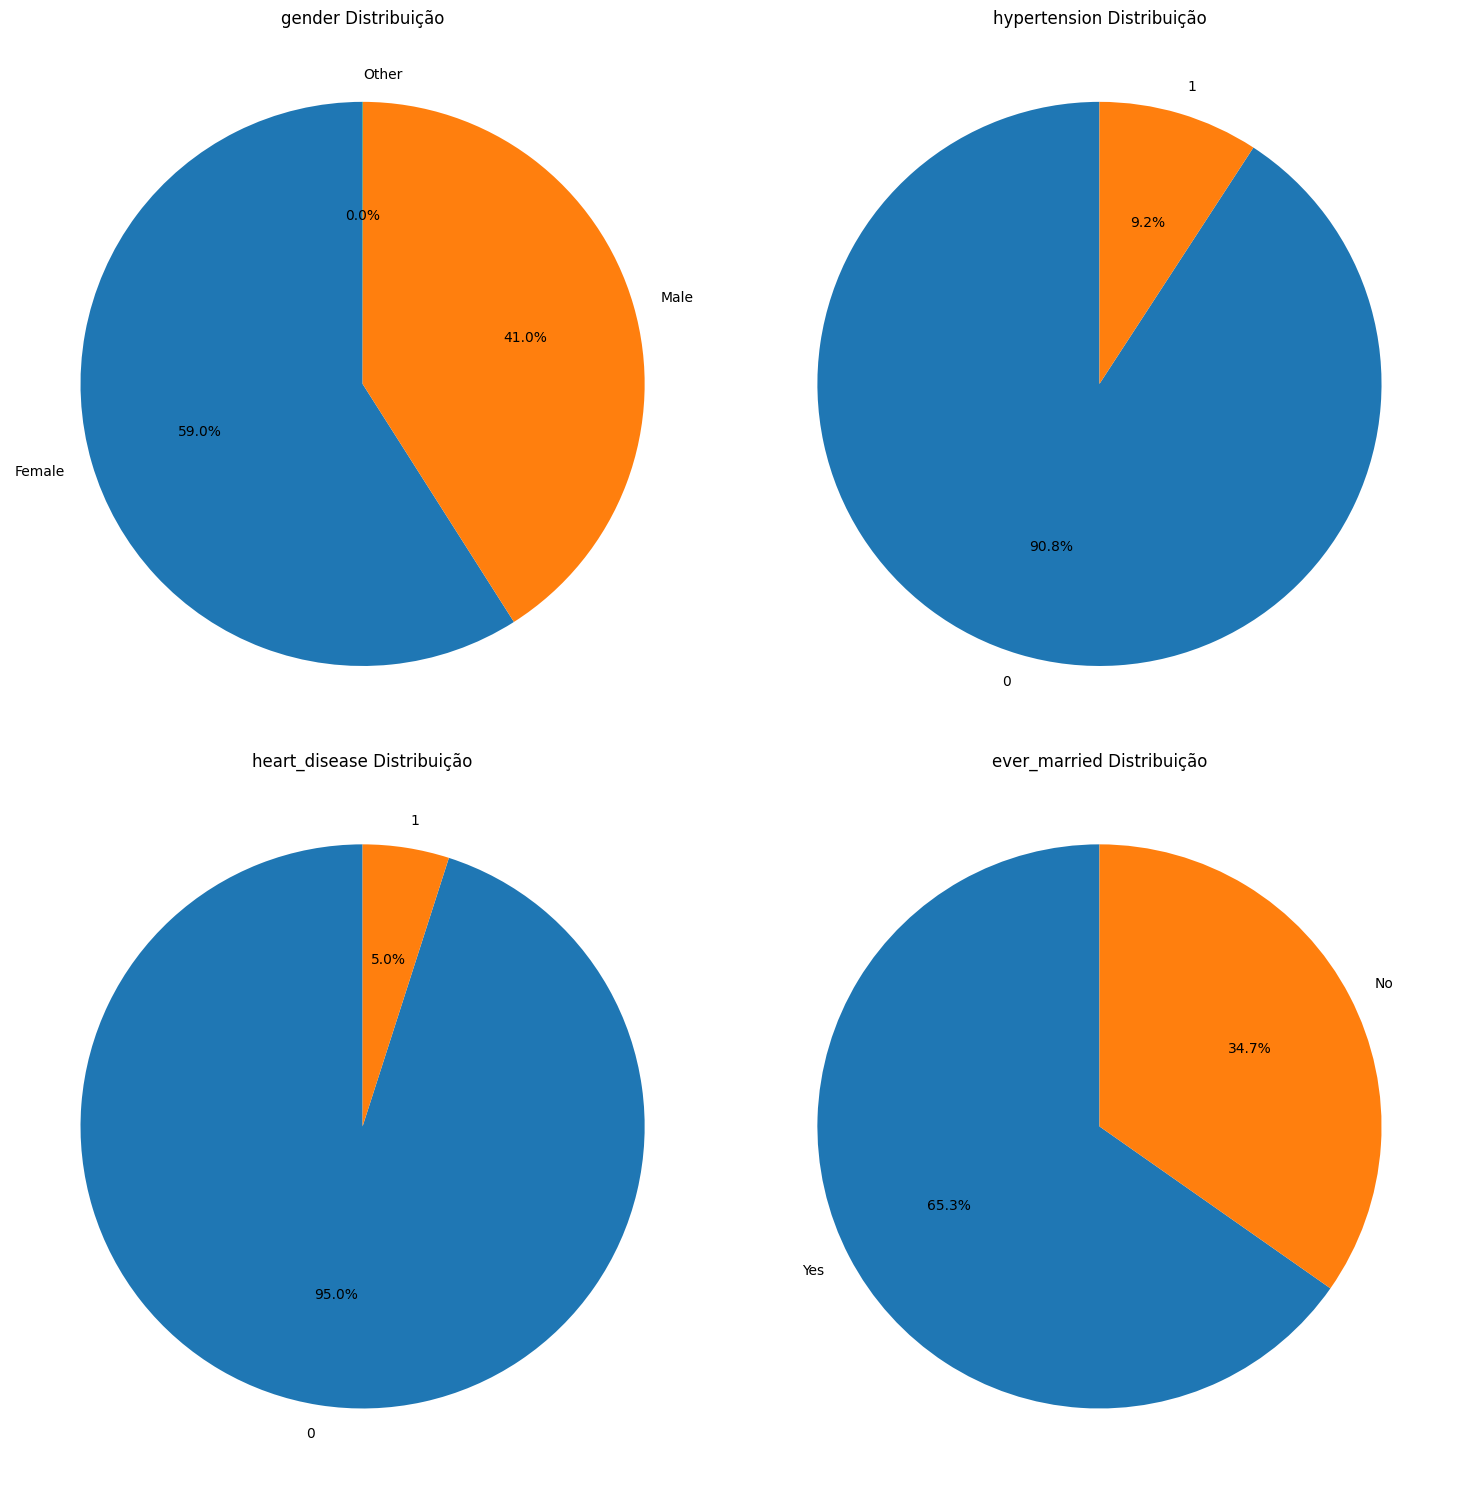

In [29]:
# Criando a figura e axes

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Criando o gráfico de pizza para variável categoricas qualitativas

for i, var in enumerate(var_qualitativas):
    if i < len(axs.flat):

        # Contar o número de ocorrências para cada categoria

        cat_counts = df[var].value_counts()

        # Criando o gráfico

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Criando o título

        axs.flat[i].set_title(f'{var} Distribuição')

# Ajuste do espaçamento entre subclasse

fig.tight_layout()

# Mostrar o gráficos

plt.show()


In [31]:
var_quantitativas

['age', 'avg_glucose_level', 'bmi']

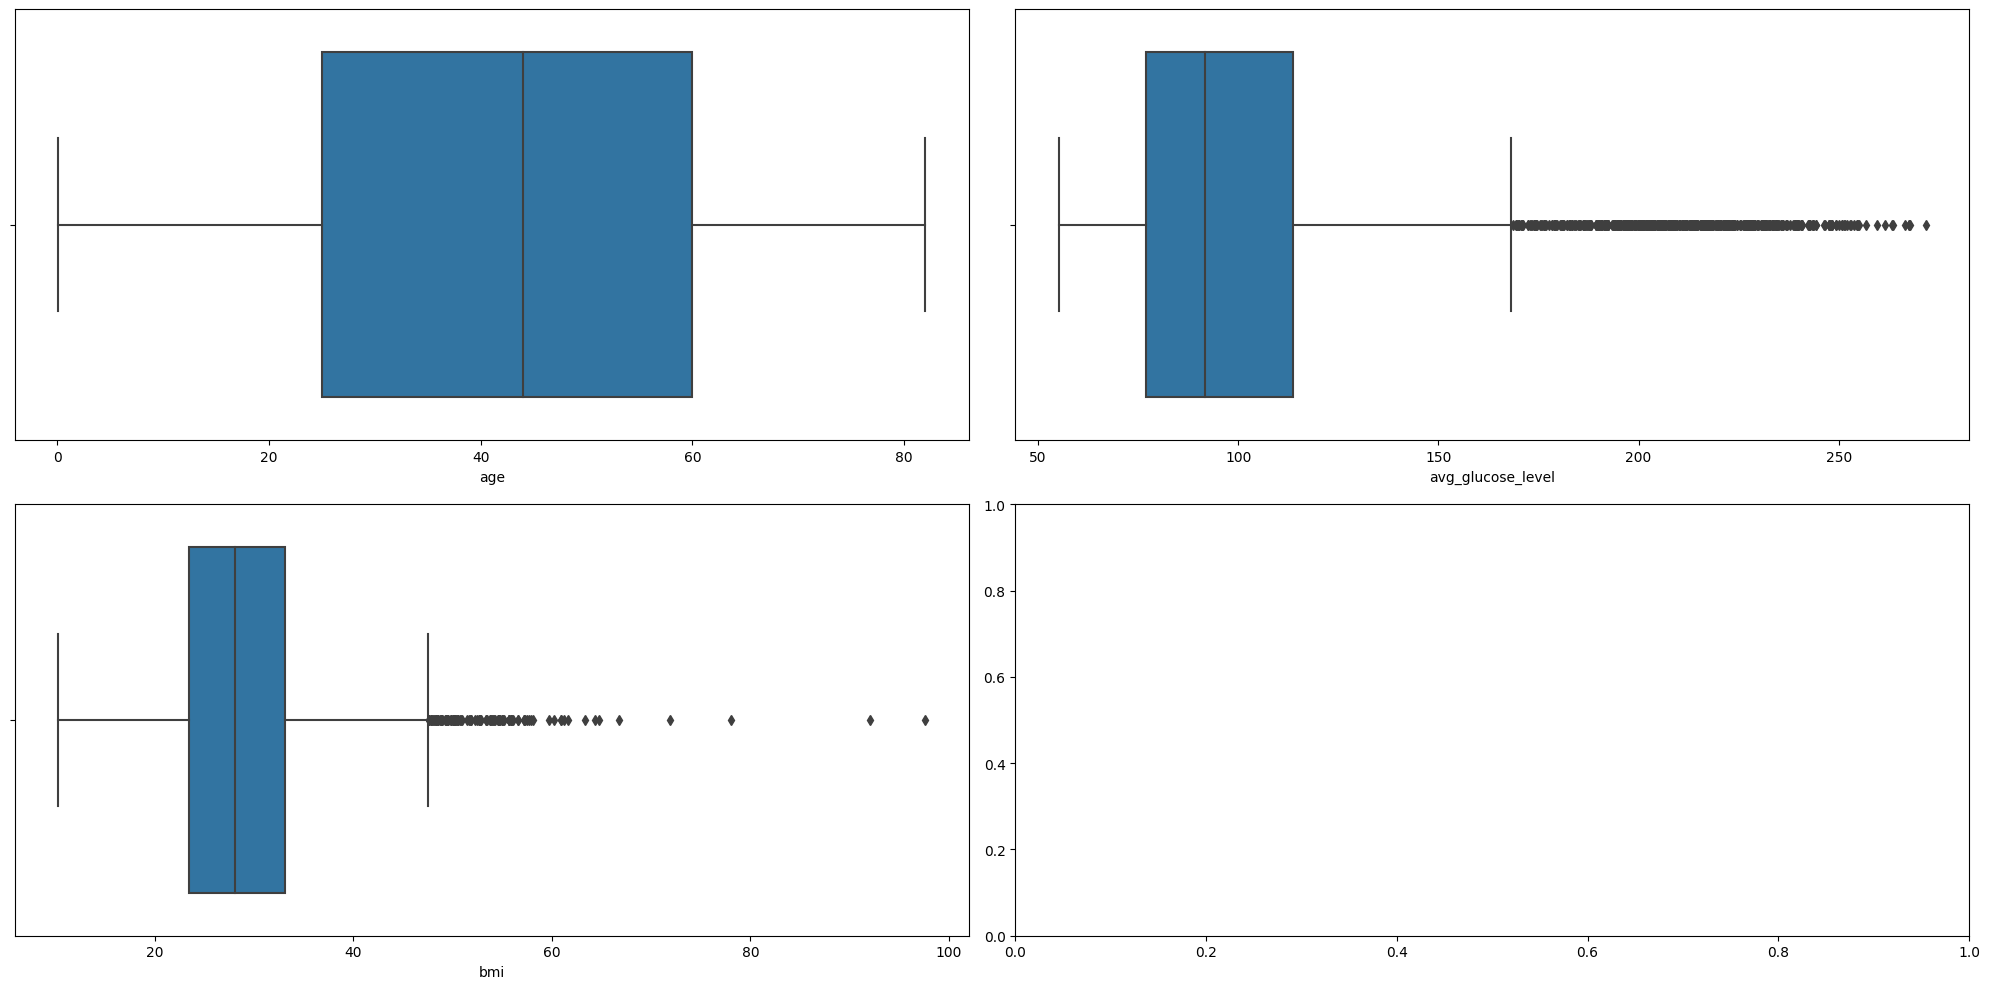

In [32]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.boxplot(x= var, data= df, ax= axs[i])

fig.tight_layout()

plt.show()

Exibindo um boxplot para uma variável quantitativa em relação à coluna 'stroke' do DataFrame df. 

Isso permite visualizar a distribuição das variáveis quantitativas com base na presença ou ausência de um acidente vascular cerebral (AVC) representado pela coluna 'stroke'.

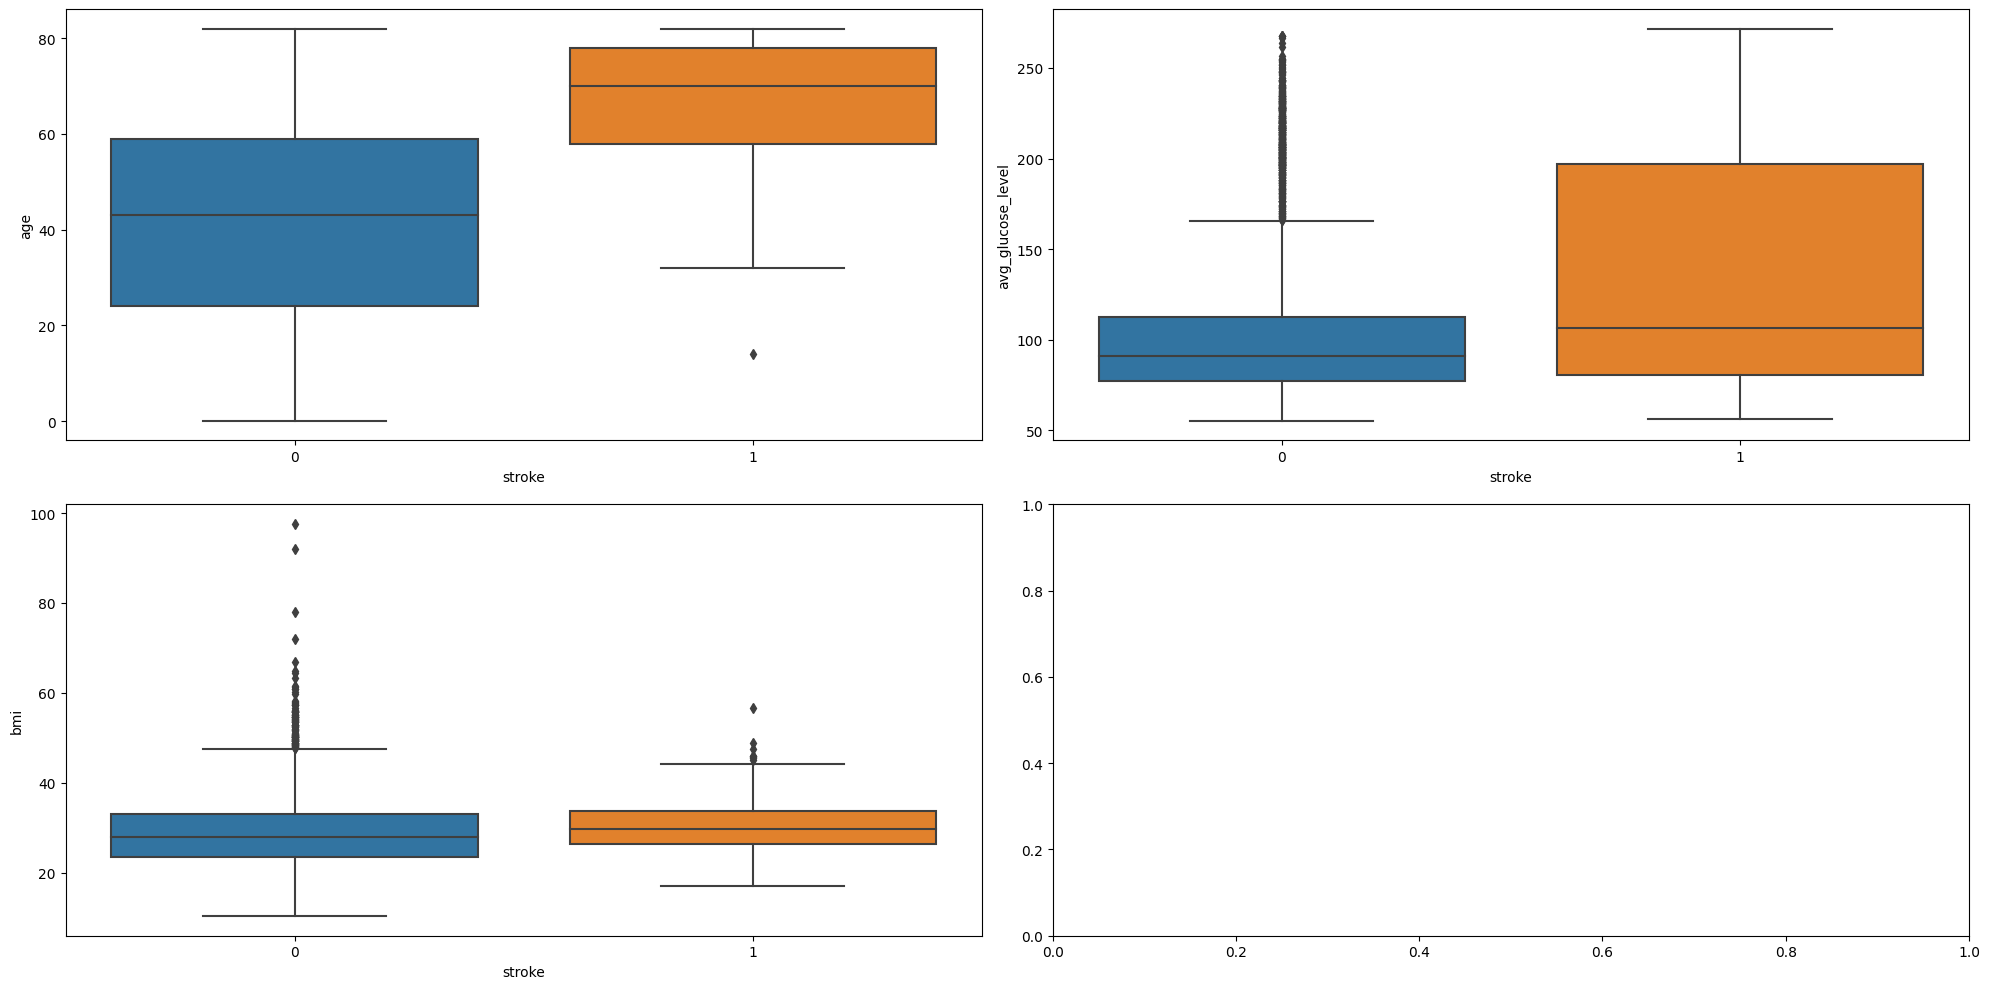

In [34]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.boxplot(y= var, x= df['stroke'], data= df, ax= axs[i])

fig.tight_layout()

plt.show()

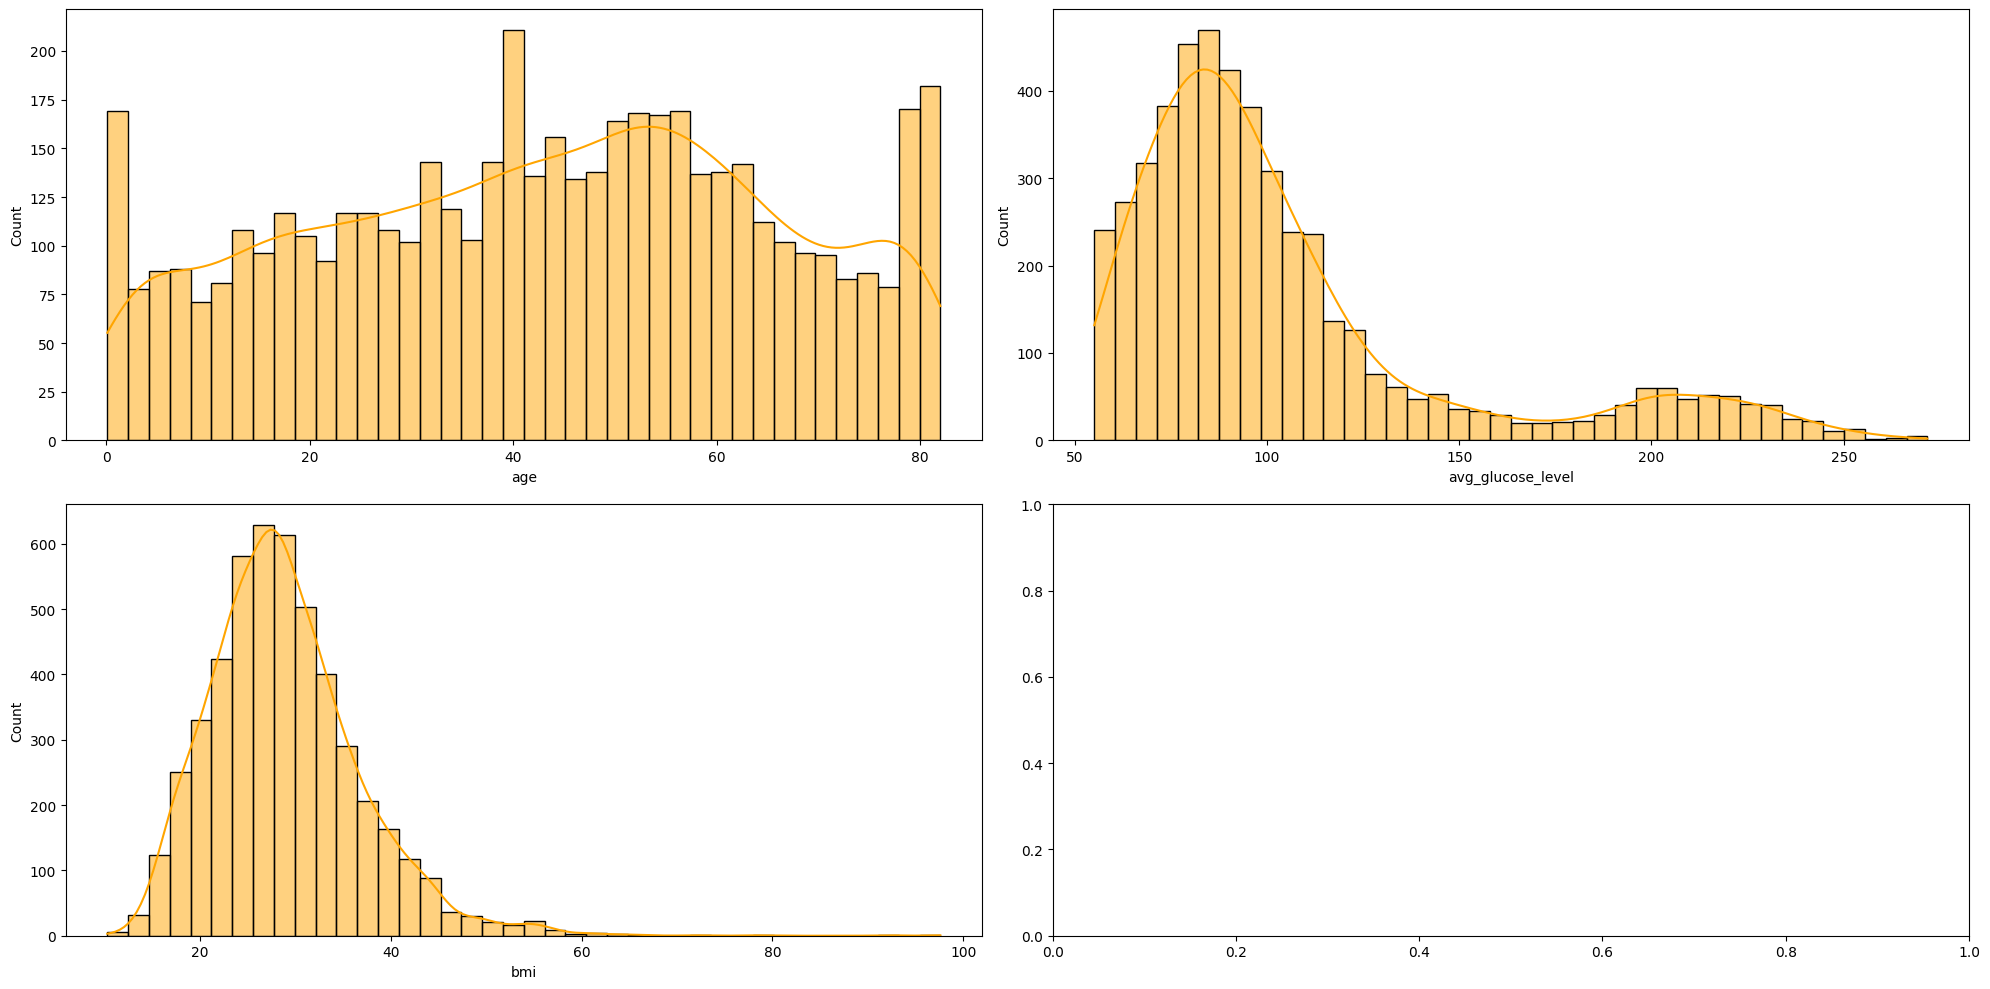

In [60]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.histplot(x= var, data= df, ax= axs[i], bins= 40, kde= True, palette= 'husl', color='orange')

fig.tight_layout()

plt.show()

Seaborn Line Plots descreve a relação entre valores contínuos e categóricos em um formato de ponto de dados contínuo.

É uma visualização de dados relacionais que mostra como uma variável contínua muda quando outra muda.

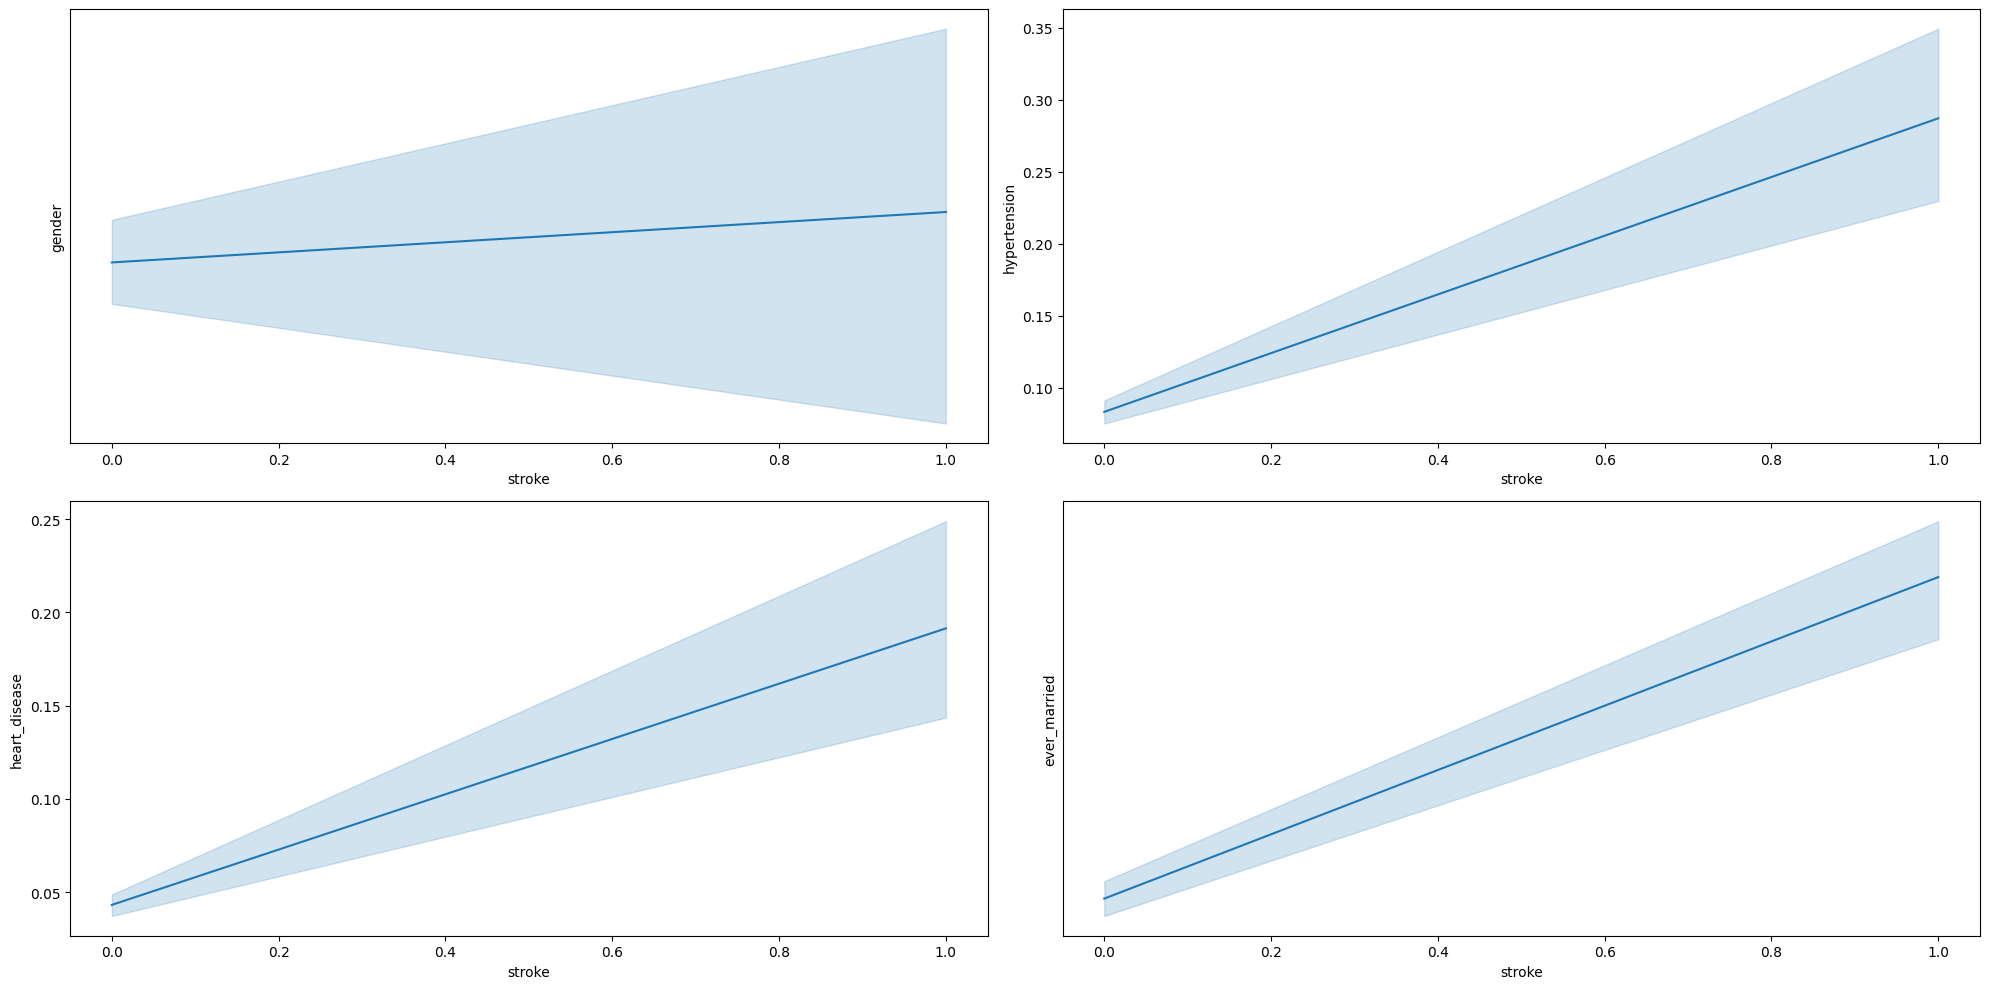

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_qualitativas):
    if i < len(axs):
        sns.lineplot(x= df['stroke'], y=var, data=df, palette='husl', ax=axs[i])

fig.tight_layout()
plt.show()


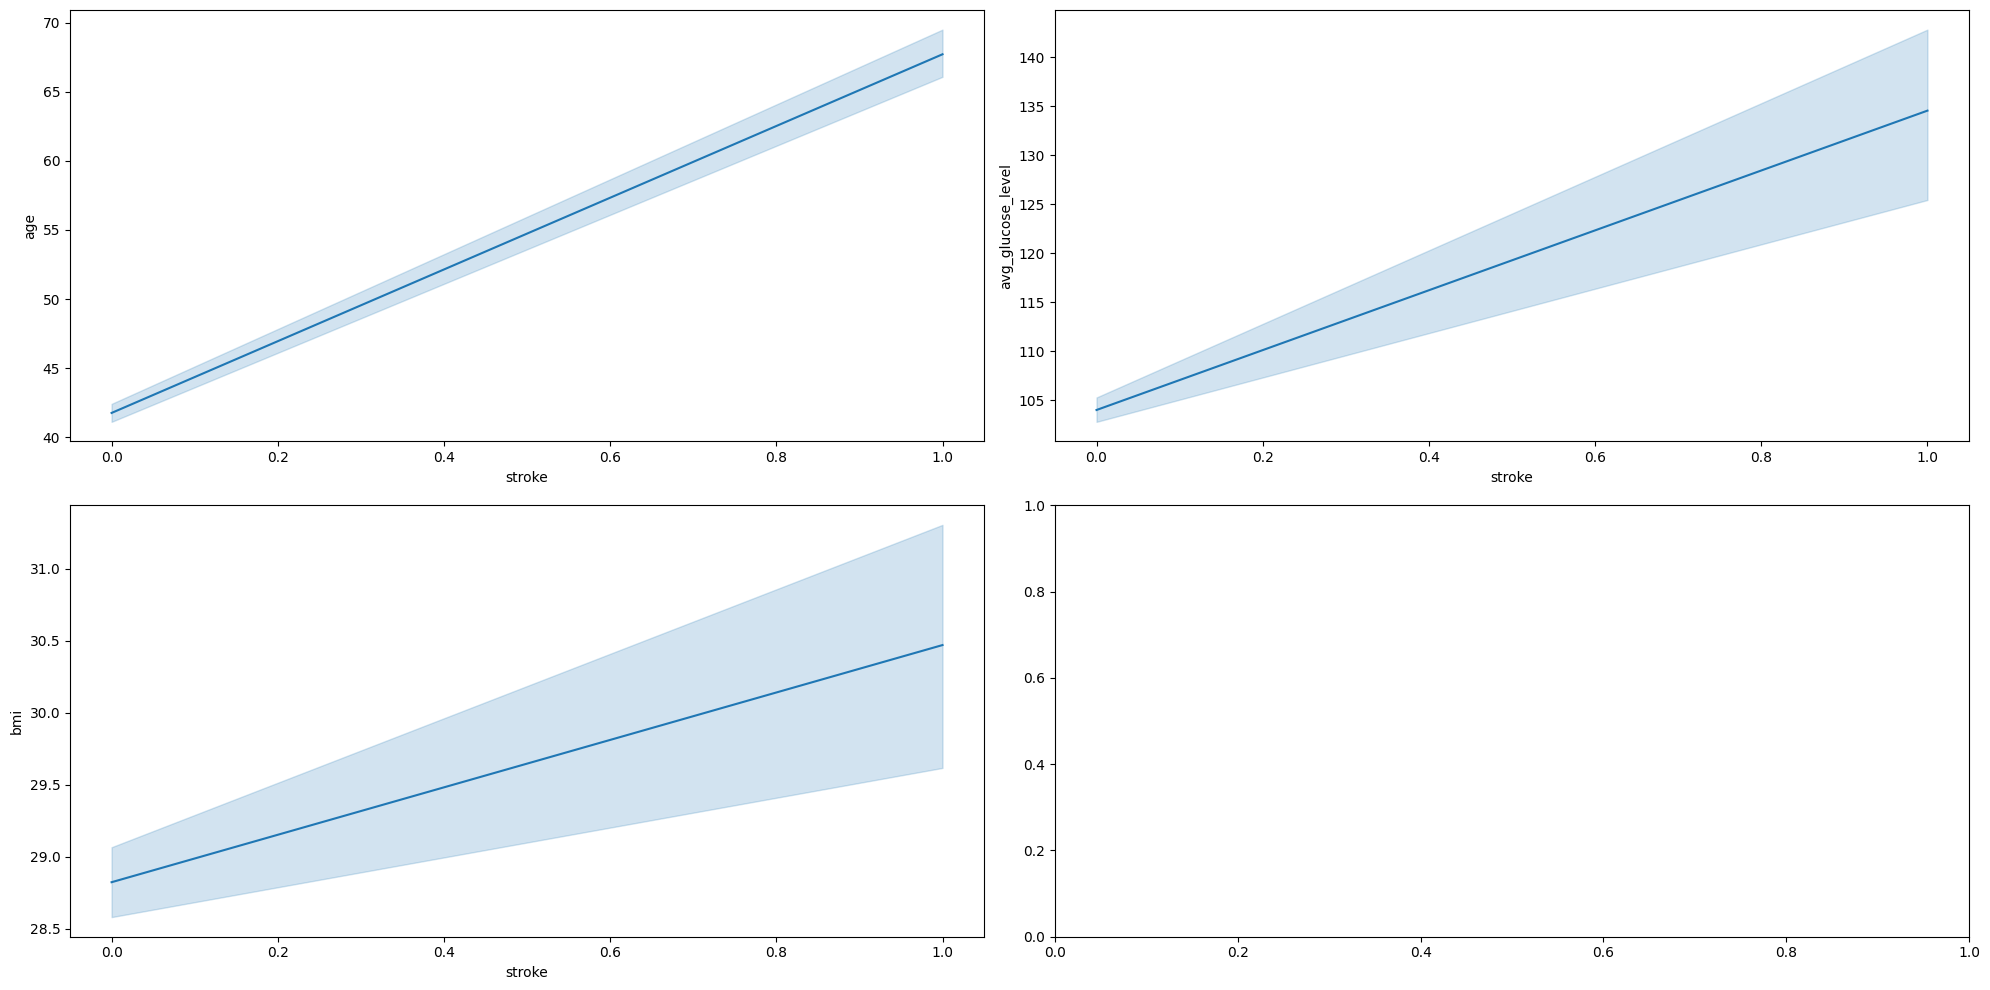

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    if i < len(axs):
        sns.lineplot(x= df['stroke'], y=var, data=df, palette='husl', ax=axs[i])

fig.tight_layout()
plt.show()

_____________________________________________________________________________________________________

Utilizando Correlação

Quadro de dados. corr ( método = 'pearson' , min_periods = 1 , numeric_only = False )

Calcule a correlação emparelhada de colunas, excluindo valores NA/nulos.

**Parâmetros método {'pearson', 'kendall', 'spearman'} ou callable**

Método de correlação:

* Pearson: coeficiente de correlação padrão

* kendall : Coeficiente de correlação Kendall Tau

* spearman: correlação de classificação de lanceiro

* callable: callable com entrada de dois ndarrays 1d e retornando um float. Observe que a matriz retornada de corr terá 1 ao longo das diagonais e será simétrica independentemente do comportamento do callable.

**min_periods int, opcional**

Número mínimo de observações necessárias por par de colunas para obter um resultado válido. Atualmente disponível apenas para correlação de Pearson e Spearman.

**numeric_only bool, padrão Falso**

Inclua apenas float , int ou dados booleanos .

_____________________________________________________________________________________________________

Explicando os diferentes componentes do código:

plt.figure(figsize=(15,6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

matrix = np.triu(df_corr) cria uma matriz triangular superior a partir da matriz de correlação df_corr. A função np.triu do NumPy retorna uma matriz com todos os elementos abaixo da diagonal principal (inclusive) definidos como zero, preservando apenas os elementos da diagonal principal e acima dela.

sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='crest') cria o mapa de calor. Ele usa a função heatmap do Seaborn para exibir as correlações entre as colunas do DataFrame df_corr. O parâmetro df_corr especifica a matriz de correlação a ser utilizada. O parâmetro annot=True adiciona os valores das correlações nos quadrados do mapa de calor. O parâmetro linewidth=.8 define a largura das linhas que separam os quadrados do mapa de calor. O parâmetro mask=matrix oculta os quadrados abaixo da diagonal principal, conforme definido na matriz triangular superior criada anteriormente. O parâmetro cmap='crest' define a paleta de cores a ser utilizada no mapa de calor.

plt.show() exibe o mapa de calor na saída.

In [59]:
# Verificar as colunas com variável numéricas

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 589.3+ KB


In [61]:
# Visualizar os nomes das colunas

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [62]:
# Selecionar somente as colunas numéricas

df_selet = df[['age','hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

In [63]:
var_qualitativas = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
var_quantitativas = ['age', 'avg_glucose_level', 'bmi'] 

In [64]:
# Visualizar a correlação, por padrão é o método 'pearson'

df_selet.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [65]:
df_corr = df_selet.corr()

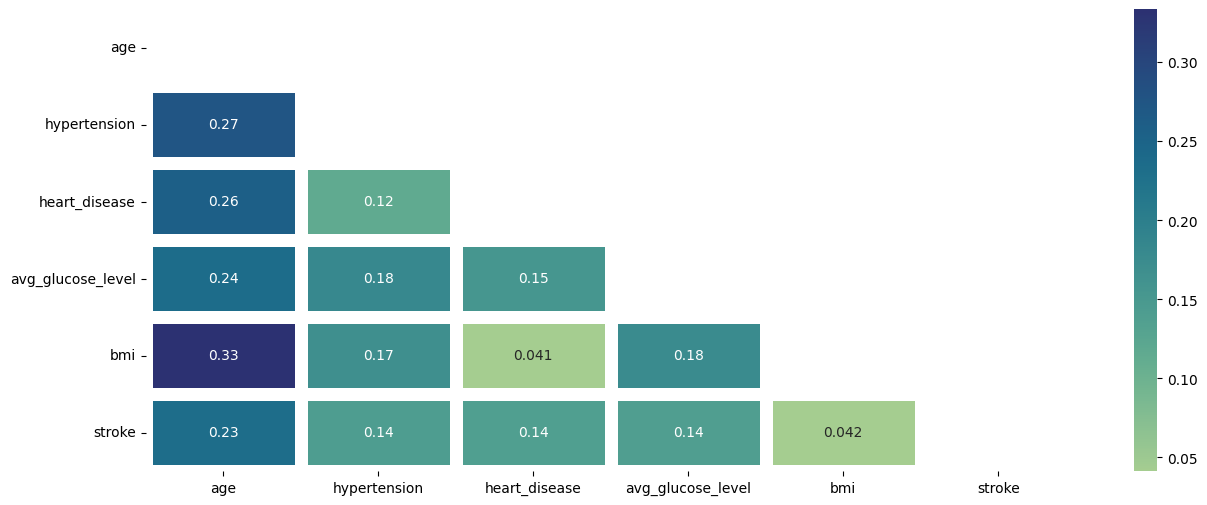

In [66]:
# Visualizar a correlação

plt.figure(figsize= (15, 6))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot= True, linewidths= 8, mask= matrix, cmap= 'crest')
plt.show()

Obs.

No gráfico acima a idade influencia em todos os casos de doenças.

# Pré-Processamento de dados

O pré-processamento de dados é uma das principais etapas da análise de dados e do aprendizado de máquina. O pré-processamento eficaz de dados é crucial para obter o maior número possível de insights e também pode nos ajudar a obter maior precisão com modelos de ML.

1. Codificação de dados
Alguns dos métodos de codificação de dados amplamente usados ​​são Label Encoding e One Hot Encoding .

a) Codificação de rótulo

A codificação de rótulos é basicamente uma forma de codificar variáveis ​​categóricas em variáveis ​​numéricas. Por exemplo, vamos considerar uma cesta que contém frutas.

cesta = ['maçã', 'laranja', 'uva', 'morango', 'melão', 'ameixa', 'banana', 'melão', 'ameixa', 'ameixa', 'uva', 'melancia' , 'melão', 'laranja']

São oito frutas únicas — maçã, laranja, uva, morango, melão, ameixa, banana e melancia, e algumas delas estão contidas mais de uma vez na cesta. Agora vamos tentar converter esses dados categóricos em forma numérica usando a função skleran.preprocessing.LabelEncoder .

from sklearn.preprocessing importar LabelEncoder
encoder = LabelEncoder () 

labels = encoder.fit_transform(cesta) 

print(labels) #[0 4 2 6 3 5 1 3 5 5 2 7 3 4]

Usando LabelEncoder, podemos ver que as variáveis ​​categóricas, frutas, são convertidas em variáveis ​​numéricas.

Para entender qual número representa qual fruta, podemos usar a operação .classes_ da seguinte forma:

<img alt="" class="bg of og c" width="313" height="199" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:313/1*FNBqCP8wtY9nVayMQH0SRg.png">

Também podemos converter os rótulos numéricos de volta aos valores categóricos originais usando a função inverse_transform().

<img alt="" class="bg of og c" width="613" height="151" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:613/1*sgWre0pSKppzfq0Ox5Bz-A.png">

O código acima importa a classe LabelEncoder do módulo preprocessing da biblioteca scikit-learn (sklearn) e aplica a codificação de rótulos (label encoding) em colunas específicas do DataFrame 'df'.

Vou explicar os diferentes componentes do código:

* from sklearn.preprocessing import LabelEncoder importa a classe 
* LabelEncoder do módulo preprocessing da biblioteca scikit-learn. O LabelEncoder é usado para transformar rótulos categóricos em valores numéricos.

* label_encoder = LabelEncoder() cria uma instância do LabelEncoder.

* df.gender = label_encoder.fit_transform(df.gender) aplica a codificação de rótulos na coluna 'gender' do DataFrame 'df'. 

* A função fit_transform ajusta o codificador aos valores únicos da coluna 'gender' e, em seguida, transforma esses valores em valores numéricos.

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Transformando as colunas qualitativas em números

df.gender = label_encoder.fit_transform(df.gender)

df.ever_married = label_encoder.fit_transform(df.ever_married)

df.work_type = label_encoder.fit_transform(df.work_type)

df.Residence_type = label_encoder.fit_transform(df.Residence_type)

df.smoking_status = label_encoder.fit_transform(df.smoking_status)

In [68]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [69]:
# Criando duas variáveis X e Y 
# Atribuindo a X o DataFrame sem a variável alvo
# Atribuindo a Y o DataFrame só com a variável alvo

x = df.drop('stroke', axis= 1)
y = df['stroke']

In [70]:
x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [71]:
y.head(5)

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [72]:
# Padronizando dados com a função StandardScaler()
# A biblioteca Python sklearn nos oferece a função StandardScaler() 
# para padronizar os valores de dados em um formato padrão.

x = pd.DataFrame(StandardScaler().fit_transform(x))


In [73]:
x.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.013595,-0.351788


# Treinamento de modelo de Machine Learning

## Divisão dos dados

O código importa a função train_test_split do módulo model_selection da biblioteca scikit-learn (sklearn) e divide um conjunto de dados em conjuntos de treinamento e teste.

Vou explicar os diferentes componentes do código:

* from sklearn.model_selection import train_test_split importa a função train_test_split do módulo model_selection da biblioteca scikit-learn. Essa função é usada para dividir um conjunto de dados em conjuntos de treinamento e teste.

* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) aplica a divisão dos dados. Aqui estão os argumentos da função:

* X é a matriz (ou DataFrame) contendo as features (características) do conjunto de dados.

* y é o vetor (ou Series) contendo os rótulos (labels) correspondentes às features do conjunto de dados.

* test_size=0.3 define a proporção do conjunto de teste em relação ao conjunto completo. Neste caso, o conjunto de teste será 30% dos dados totais, enquanto o conjunto de treinamento será 70%.

* random_state=42 define a semente (seed) para garantir a reprodutibilidade dos resultados. Ao usar o mesmo valor para random_state, a divisão dos dados será sempre a mesma, o que é útil para fins de comparação e reprodução dos resultados.

* X_train é a matriz (ou DataFrame) resultante das features do conjunto de treinamento.

* X_test é a matriz (ou DataFrame) resultante das features do conjunto de teste.

* y_train é o vetor (ou Series) resultante dos rótulos do conjunto de treinamento.

* y_test é o vetor (ou Series) resultante dos rótulos do conjunto de teste.

Portanto, o código divide os dados em conjuntos de treinamento e teste, onde X_train e y_train são usados para treinar um modelo e X_test e y_test são usados para avaliar o desempenho do modelo. A proporção de divisão é de 70% para treinamento e 30% para teste, e o valor 42 é usado como semente aleatória para garantir a reprodutibilidade dos resultados.

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [75]:
x_train

,0,1,2,3,4,5,6,7,8,9
336,-0.833023,-1.279901,-0.318067,-0.228208,-1.370831,1.674998,-1.014569,-0.741677,-1.068757,-1.288808
2303,-0.833023,0.671075,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.892510,-0.546682,-0.351788
4772,-0.833023,0.759755,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.141945,-0.355678,0.585232
3193,-0.833023,-1.058199,-0.318067,-0.228208,-1.370831,-0.155697,0.985640,-0.586566,-0.674017,-1.288808
4326,-0.833023,1.735243,-0.318067,-0.228208,0.729484,-0.155697,0.985640,-0.510474,-1.399830,1.522252
...,...,...,...,...,...,...,...,...,...,...
4426,-0.833023,-1.058199,-0.318067,-0.228208,-1.370831,-0.155697,0.985640,-0.360316,-0.865021,0.585232
466,-0.833023,0.360692,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.503720,0.102730,1.522252
3092,-0.833023,0.449373,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.329924,-0.865021,-0.351788
3772,-0.833023,-1.412922,-0.318067,-0.228208,-1.370831,1.674998,-1.014569,-0.265538,-1.030557,-1.288808


In [76]:
y_train

378     0
2420    0
4967    0
3348    0
4511    0
       ..
4613    0
511     0
3247    0
3946    0
916     0
Name: stroke, Length: 3436, dtype: int64

## Decision Tree ( Árvore de decisão )

A Árvore de Decisão é uma ferramenta de tomada de decisão que usa uma estrutura de árvore semelhante a um fluxograma ou é um modelo de decisões e todos os seus resultados possíveis, incluindo resultados, custos de insumos e utilidade.
O algoritmo de árvore de decisão se enquadra na categoria de algoritmos de aprendizado supervisionado. Ele funciona para variáveis ​​de saída contínuas e categóricas.

Os ramos/bordas representam o resultado do nó e os nós possuem: 

Condições [nós de decisão]
Resultado [nós finais]
Os ramos/arestas representam a veracidade/falsidade da afirmação e toma uma decisão com base no exemplo abaixo que mostra uma árvore de decisão que avalia o menor de três números:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/decision-tree.jpg" alt="">

Regressão de Árvore de Decisão: 
A regressão de árvore de decisão observa características de um objeto e treina um modelo na estrutura de uma árvore para prever dados no futuro para produzir uma saída contínua significativa. Saída contínua significa que a saída/resultado não é discreto, ou seja, não é representado apenas por um conjunto discreto e conhecido de números ou valores.

Exemplo de saída discreta: um modelo de previsão do tempo que prevê se haverá ou não chuva em um determinado dia. 
Exemplo de saída contínua: Um modelo de previsão de lucro que indica o lucro provável que pode ser gerado com a venda de um produto.
Aqui, valores contínuos são previstos com a ajuda de um modelo de regressão de árvore de decisão.

______________________________________________________________________________________________________

Vamos analisar o código linha por linha:

* from sklearn.tree import DecisionTreeClassifier: Esta linha importa a classe DecisionTreeClassifier da biblioteca sklearn.tree. Essa classe é responsável por criar um modelo de classificação baseado em árvore de decisão.

* classifier = DecisionTreeClassifier(criterion='entropy', random_state=0): Aqui, estamos criando uma instância da classe DecisionTreeClassifier. O parâmetro criterion especifica a medida usada para avaliar a qualidade da divisão dos nós da árvore. Nesse caso, está sendo utilizado o critério de "entropia". O parâmetro random_state é usado para garantir a reprodutibilidade dos resultados, fixando a semente do gerador de números aleatórios em 0.

* classifier.fit(X_train, y_train): Essa linha ajusta (ou treina) o modelo de árvore de decisão aos dados de treinamento. Os argumentos X_train e y_train são as variáveis de treinamento, onde X_train representa os atributos (features) do conjunto de treinamento e y_train representa as classes (rótulos) correspondentes.

Basicamente, esse código cria um classificador de árvore de decisão com base no critério de entropia, ajusta o modelo aos dados de treinamento e está pronto para fazer previsões usando os dados de teste ou novos dados. É importante ressaltar que este trecho de código não inclui a definição ou importação das variáveis X_train e y_train, então é necessário ter essas variáveis definidas anteriormente no código para que ele funcione corretamente.

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Criando uma instância do modelo

classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)

# Treinando o modelo

classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
# Fazendo previsões

y_pred = classifier.predict(x_test)

print(f'A previsão é: {y_pred}')

A previsão é: [0 0 0 ... 0 0 0]


Entendendo o que é Matriz de Confusão

É uma ferramenta muito usada para avaliações de modelos de classificação em Aprendizado de Máquina (mais comumente chamado de Machine Learning).

Para termos dados de exemplo, imagine que eu tivesse um modelo que, dada as características fisiológicas de uma paciente, dissesse que a mesma está grávida ou não. Porém, para o nosso contexto, eu só trarei uma lista com os dados reais, e uma lista de dados preditos pelo modelo, ambos dados fake.

<img alt="" class="bg ms mt c" width="513" height="80" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:513/1*TfoXaIAxmUdEr4q_jBIs6g.png">

Como saber se meu modelo previu bem? Como saber se ele prevê bem a classe que queremos (Grávida)? Essas e outras questões podemos entender com as matrizes de confusão.

O que são matrizes de confusão?

É um tabela que mostra as frequências de classificação para cada classe do modelo. Pegando o exemplo acima, ela vai nos mostrar as frequências:

* Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.

* Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.

* Falso verdadeiro (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.

* Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a mulher está grávida e o modelo previu incorretamente que ela não está grávida.

Ao final teremos para o conjunto acima

<img alt="" class="bg ms mt c" width="404" height="90" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:404/1*DYOERtaPlawq2-LDmFK5EA.png">

<img alt="" class="bg ms mt c" width="327" height="85" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:327/1*Glcsi60bv6wqGKN7ozDu3Q.png">

Assim, nosso modelo:

* Previu grávida 3 vezes corretamente
* Previu não grávidas 4 vezes corretamente
* Previu grávida 1 vez incorretamente
* Previu não grávida 2 vezes incorretamente

A seguir, analisaremos algumas informações úteis que podemos tirar dessa tabela

Alguns conceitos importantes decorrentes da matriz

* Acurácia
Diz quanto o meu modelo acertou das previsões possíveis. No contexto acima, nosso modelo teve uma acurácia de 70%, pois acertou 7 das 10 previsões. E a razão entre o somatório das previsões corretas (verdadeiros positivos com verdadeiros negativos) sobre o somatório das previsões.

<img alt="" class="bg ms mt c" width="589" height="87" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:589/1*tNTpugu1beoC3f6ivswnsA.png">

Mas isso é tudo?

* Recall
Recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se a mulher está grávida. É definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

<img alt="" class="bg ms mt c" width="198" height="83" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:198/1*zgmkLfNNRtFwCHp8m46AKA.png">

* Precisão
Ainda usando o material do Google Developers, eles definem precisão como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

<img alt="" class="bg ms mt c" width="238" height="79" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:238/1*pJrHo_sp-pnLFl6Ww3imUw.png">

* f-score
Já o f-score nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

<img alt="" class="bg ms mt c" width="260" height="81" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:260/1*sBVtY3BJoJbOs47ZZx46tA.png">

Uma observação muito importante. Os cálculos acima visam entender o seu modelo sobre os dados positivos. Ou seja, quero prever se a paciente está grávida, portanto vou olhar métricas para avaliar essa classe. Quando estamos falando de classificação multiclass (mais de duas classes possíveis de resposta), podemos trabalhar sobre a classe que queremos prever, mas também podemos olhar para cada classe em separado. Para tanto, pode ser útil, na hora de fazer a matriz de confusão, considerar a classe que queremos prever como a classe positiva, e todo o restante como negativo, assim, “inferimos” uma classificação binária só para entender o quão bem o nosso modelo está em prever a classe que queremos.

O pacote metrics do sklearn, possui uma função muito interessante: classification_report, que entrega todas as métricas acima prontas em formato tabular, vale a pena a conferida. Tais métricas são consideradas para cada classe do nosso modelo. Um exemplo no print abaixo:

<img alt="" class="bg ms mt c" width="480" height="155" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:480/1*BML_JiMMg8_ZtZSrMs29MQ.png">

______________________________________________________________________________________________________

Vamos analisar o código linha por linha:

* from sklearn.metrics import confusion_matrix: Esta linha importa a função confusion_matrix da biblioteca sklearn.metrics. A função confusion_matrix é utilizada para calcular a matriz de confusão, que é uma ferramenta de avaliação de desempenho para problemas de classificação.

* cm = confusion_matrix(y_test, y_pred): Aqui, estamos utilizando a função confusion_matrix para calcular a matriz de confusão. A matriz de confusão é calculada comparando as classes verdadeiras (y_test) com as classes previstas (y_pred), que são obtidas a partir do modelo treinado. A matriz de confusão é armazenada na variável cm.

A matriz de confusão é uma tabela quadrada que mostra a contagem de observações classificadas corretamente e incorretamente pelo modelo em cada classe. 

* VP (Verdadeiro Positivo): indica o número de observações que foram classificadas corretamente como positivas.
* FN (Falso Negativo): indica o número de observações que foram classificadas incorretamente como negativas.
* FP (Falso Positivo): indica o número de observações que foram classificadas incorretamente como positivas.
* VN (Verdadeiro Negativo): indica o número de observações que foram classificadas corretamente como negativas.

A matriz de confusão fornece informações sobre o desempenho do modelo, permitindo a análise de erros de classificação e a avaliação de métricas como acurácia, precisão, recall, entre outras.


In [79]:
from sklearn.metrics import confusion_matrix

# Criando uma instância

cm = confusion_matrix(y_test, y_pred)

In [80]:
print('Matriz de Confusão : \n',cm)

Matriz de Confusão : 
 [[1352   49]
 [  63    9]]


<function matplotlib.pyplot.show(close=None, block=None)>

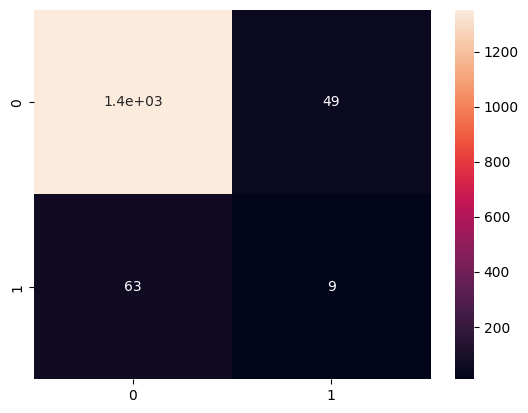

In [81]:
sns.heatmap(cm, annot = True)
plt.show

Vamos analisar os valores da matriz de confusão:

- Verdadeiro Positivo (True Positive, TP): O valor 1334 na posição (0, 0) indica o número de observações que foram corretamente classificadas como positivas (classe 1).

- Falso Positivo (False Positive, FP): O valor 63 na posição (0, 1) indica o número de observações que foram incorretamente classificadas como positivas (classe 1), mas na verdade são negativas (classe 0).

- Falso Negativo (False Negative, FN): O valor 49 na posição (1, 0) indica o número de observações que foram incorretamente classificadas como negativas (classe 0), mas na verdade são positivas (classe 1).

- Verdadeiro Negativo (True Negative, TN): O valor 9 na posição (1, 1) indica o número de observações que foram corretamente classificadas como negativas (classe 0).

A partir desses valores, podemos interpretar a matriz de confusão e obter algumas métricas de avaliação do modelo:

- Precisão (Precision): A precisão é a proporção de observações corretamente classificadas como positivas em relação ao total de observações classificadas como positivas. Nesse caso, a precisão pode ser calculada como TP / (TP + FP) = 1334 / (1334 + 63) ≈ 0.9525, ou seja, aproximadamente 95.25%.

- Revocação (Recall): A revocação é a proporção de observações corretamente classificadas como positivas em relação ao total de observações reais da classe positiva. Nesse caso, a revocação pode ser calculada como TP / (TP + FN) = 1334 / (1334 + 49) ≈ 0.9533, ou seja, aproximadamente 95.33%.

- Acurácia (Accuracy): A acurácia é a proporção de observações corretamente classificadas em relação ao total de observações. Nesse caso, a acurácia pode ser calculada como (TP + TN) / (TP + TN + FP + FN) = (1334 + 9) / (1334 + 63 + 49 + 9) ≈ 0.9239, ou seja, aproximadamente 92.39%.

Essas métricas fornecem uma avaliação do desempenho do modelo de classificação. No geral, observa-se uma alta precisão e revocação para a classe 1, indicando que o modelo é bom em identificar corretamente as observações positivas. No entanto, deve-se notar que o número de falsos negativos (65) é relativamente alto, o que indica que o modelo falha em classificar corretamente algumas observações positivas. A acurácia geral do modelo é de aproximadamente 92.39%, o que indica um bom desempenho geral em classificar corretamente as observações, considerando ambas as classes.

In [82]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [83]:
print('\n Relatório de classificação %s:\n%s\n' % (classifier, 
metrics.classification_report(y_test, y_pred)))


 Relatório de classificação DecisionTreeClassifier(criterion='entropy', random_state=0):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1401
           1       0.16      0.12      0.14        72

    accuracy                           0.92      1473
   macro avg       0.56      0.55      0.55      1473
weighted avg       0.92      0.92      0.92      1473




A saída que você apresentou é uma tabela que contém algumas métricas de avaliação do modelo de classificação. Vamos analisar as métricas uma por uma:

- Precision (Precisão): A precisão é a proporção de observações classificadas corretamente como positivas em relação ao total de observações classificadas como positivas. Para a classe 0, a precisão é de 0.95, o que significa que 95% das observações classificadas como classe 0 são realmente da classe 0. Para a classe 1, a precisão é de 0.09, indicando que apenas 9% das observações classificadas como classe 1 são realmente da classe 1.

- Recall (Revocação): A revocação é a proporção de observações classificadas corretamente como positivas em relação ao total de observações reais da classe positiva. Para a classe 0, o recall é de 0.95, o que significa que 95% das observações da classe 0 foram corretamente identificadas como tal. Para a classe 1, o recall é de 0.10, indicando que apenas 10% das observações da classe 1 foram corretamente identificadas como tal.

- F1-score: O F1-score é uma média harmônica entre precisão e recall, fornecendo uma medida de desempenho balanceada entre as duas métricas. Para a classe 0, o F1-score é de 0.95, e para a classe 1, é de 0.10.

- Support (Suporte): O suporte é o número de observações reais em cada classe. Para a classe 0, o suporte é de 1401, indicando que há 1401 observações reais da classe 0. Para a classe 1, o suporte é de 72.

- Accuracy (Acurácia): A acurácia é a proporção de observações classificadas corretamente em relação ao total de observações. Nesse caso, a acurácia é de 0.91, o que significa que o modelo classificou corretamente 91% das observações.

- Macro avg (Média macro): A média macro é a média não ponderada das métricas de precisão, recall e F1-score em todas as classes. Nesse caso, a média macro para precisão, recall e F1-score é de 0.52.

- Weighted avg (Média ponderada): A média ponderada é a média das métricas de precisão, recall e F1-score ponderadas pelo suporte de cada classe. Nesse caso, a média ponderada para precisão, recall e F1-score é de 0.91.

Essas métricas fornecem informações sobre o desempenho do modelo de classificação, permitindo avaliar sua eficácia na tarefa de classificação. No geral, observa-se que o modelo tem um desempenho melhor para a classe 0 em comparação com a classe 1, com uma alta precisão, recall e F1-score para a classe 0, enquanto para a classe 1 essas métricas são bastante baixas.

## Logistic Regression ( Regressão Logística )

Utilizar as bibliotecas imblearn.over_sampling e collections para realizar o balanceamento de classes usando a técnica SMOTE (Synthetic Minority Over-sampling Technique). Vamos analisar o código linha por linha:

from imblearn.over_sampling import SMOTE: Esta linha importa a classe SMOTE da biblioteca imblearn.over_sampling. A biblioteca imblearn é uma extensão da biblioteca scikit-learn que fornece técnicas de balanceamento de classes.

from collections import Counter: Esta linha importa a classe Counter da biblioteca collections. A classe Counter é utilizada para contar a ocorrência de elementos em uma lista.

Após essas importações, é possível utilizar a classe SMOTE para realizar o balanceamento de classes utilizando a técnica SMOTE.

Veja um exemplo de como essa técnica pode ser utilizada:

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Onde:

X é uma matriz de características (features) do conjunto de dados.
y é um vetor de classes (rótulos) correspondentes ao conjunto de dados.
A classe SMOTE cria instâncias sintéticas da classe minoritária (classe com menos amostras) para equilibrar as classes no conjunto de dados. Isso é feito através da geração de novos exemplos sintéticos com base nos exemplos existentes da classe minoritária.

Após a aplicação do SMOTE, as matrizes X_resampled e y_resampled conterão as características e as classes balanceadas, respectivamente.

O uso do SMOTE é útil quando há um desequilíbrio significativo entre as classes no conjunto de dados, e é necessário aumentar a quantidade de amostras da classe minoritária para melhorar o desempenho do modelo de classificação.

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [85]:
# Criando uma instância do modelo

smote = SMOTE()

In [86]:
# Treinando o modelo

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [87]:
# Verificar os dois conjuntos de dados Y

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 3299, 1: 137})
Counter({0: 3299, 1: 3299})


In [88]:
# O conjunto X não é alterado

print(Counter(x_train))
print(Counter(x_train_smote))

Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})


Obs.

Veja a diferença na quantidade de dados gerados pelo SMOTE, agora esta equilibrado

Utilizar a classe LogisticRegression da biblioteca scikit-learn para criar e treinar um modelo de regressão logística. Vamos analisar o código linha por linha:

clf = LogisticRegression(): Esta linha cria uma instância da classe LogisticRegression, que representa um modelo de regressão logística.

clf.fit(X_train_smote, y_train_smote): Aqui, estamos ajustando (ou treinando) o modelo de regressão logística aos dados de treinamento. Os argumentos X_train_smote e y_train_smote são as variáveis de treinamento após a aplicação do SMOTE, ou seja, são as características (features) e as classes (rótulos) balanceados pelo SMOTE.

O método fit é usado para treinar o modelo, ajustando-o aos dados de treinamento. Durante o treinamento, o modelo aprende os parâmetros (coeficientes) que melhor se ajustam aos dados, utilizando a abordagem da regressão logística.

Após o treinamento, o modelo clf estará pronto para fazer previsões em novos dados usando o método predict. Por exemplo:

y_pred = clf.predict(X_test)

Onde X_test é a matriz de características dos dados de teste. O vetor y_pred conterá as previsões do modelo para os dados de teste.

In [89]:
# Criando uma instância do modelo

clf = LogisticRegression()

# Treinando o modelo

clf.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [90]:
# Fazendo previsões

y_pred = clf.predict(x_test)

In [91]:
accuracy_score(y_test, y_pred)

0.7440597420230821

 Importar várias métricas de avaliação de desempenho da biblioteca sklearn.metrics. Vamos analisar cada importação linha por linha:

* from sklearn.metrics import accuracy_score: Esta linha importa a função accuracy_score, que é utilizada para calcular a acurácia do modelo de classificação. A acurácia é a proporção de observações corretamente classificadas em relação ao total de observações.

* from sklearn.metrics import classification_report: Esta linha importa a função classification_report, que gera um relatório de classificação contendo várias métricas, como precisão, recall, F1-score e suporte, para cada classe no modelo de classificação.

* from sklearn.metrics import confusion_matrix: Esta linha importa a função confusion_matrix, que é utilizada para calcular a matriz de confusão. A matriz de confusão é uma tabela que mostra as contagens de observações classificadas corretamente e incorretamente por classe.

* from sklearn.metrics import recall_score: Esta linha importa a função recall_score, que é utilizada para calcular o recall (revocação), também conhecido como taxa de verdadeiros positivos. O recall é a proporção de observações positivas corretamente classificadas em relação ao total de observações positivas reais.

* from sklearn.metrics import precision_score: Esta linha importa a função precision_score, que é utilizada para calcular a precisão. A precisão é a proporção de observações positivas corretamente classificadas em relação ao total de observações classificadas como positivas.

Essas métricas de avaliação de desempenho são comumente utilizadas para analisar e medir o quão bem um modelo de classificação está performando em relação às classes previstas e as classes reais. Com essas métricas, você pode obter informações detalhadas sobre a precisão, revocação, F1-score, acurácia e outros aspectos do modelo de classificação.

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

Utilizar a função recall_score da biblioteca sklearn.metrics para calcular o recall (revocação) entre as classes previstas (y_pred) e as classes reais (y_test). Vamos analisar a função e como ela é utilizada:

recall = recall_score(y_test, y_pred)

Nesse caso, a função recall_score recebe dois argumentos:

y_test: É o vetor contendo as classes reais (rótulos) do conjunto de teste.
y_pred: É o vetor contendo as classes previstas pelo modelo de classificação.
A função recall_score calcula o recall para cada classe presente nos vetores y_test e y_pred. O recall é a proporção de observações positivas corretamente classificadas em relação ao total de observações positivas reais. Ele é útil para avaliar a capacidade do modelo em identificar corretamente as observações de uma determinada classe.

O valor retornado pela função recall_score é o recall médio entre todas as classes presentes nos vetores y_test e y_pred. É importante destacar que, para utilizar corretamente essa função, as classes precisam ser codificadas de forma binária, onde 1 representa a classe positiva e 0 a classe negativa.

Após a execução do código, a variável recall conterá o valor do recall calculado.

In [93]:
recall_score(y_test, y_pred)

0.8611111111111112

In [94]:
precision_score(y_test, y_pred)

0.1445221445221445

In [95]:
confusion_matrix(y_test, y_pred)

array([[1034,  367],
       [  10,   62]])

<img src="https://cdn1.gnarususercontent.com.br/1/498622/01bf6306-57d4-4df0-a2d9-01b13e1c36a9.png" alt="Matriz de confusão onde na primeira posição no canto superior tem os True Positives, à direita os False Negatives, no canto inferior esquerdo os False Positive e à direita os True Negatives">

Assim, nosso modelo:

* Previu 1033 vezes TP corretamente Verdadeiro Positivo
* Previu 61 vezes TN corretamente Verdadeiro Negativo
* Previu 368 vezes FN incorretamente Falso Negativo
* Previu 11 vezes FP incorretamente Falso Positivo

A seguir, analisaremos algumas informações úteis que podemos tirar dessa tabela

Alguns conceitos importantes decorrentes da matriz

* Acurácia
Diz quanto o meu modelo acertou das previsões possíveis. No contexto acima, nosso modelo teve uma acurácia de 74,27%, pois acertou 1094 das 1473 previsões. E a razão entre o somatório das previsões corretas (verdadeiros positivos com verdadeiros negativos) sobre o somatório das previsões.

In [96]:
# Uma melhor visualização 

pd.crosstab(y_test, y_pred)

col_0,0,1
stroke,,
0,1034,367
1,10,62


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1401
           1       0.14      0.86      0.25        72

    accuracy                           0.74      1473
   macro avg       0.57      0.80      0.55      1473
weighted avg       0.95      0.74      0.82      1473



Obs.

Acurácia é a mesma apresentada da Matriz de confusão

<function matplotlib.pyplot.show(close=None, block=None)>

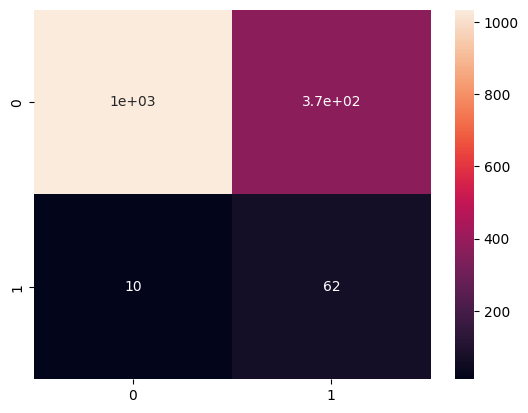

In [98]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot = True)
plt.show

## Random Forest (Floresta Aleatória)

 Cria uma instância do modelo RandomForestClassifier da biblioteca scikit-learn.

 model = RandomForestClassifier(random_state=5, n_estimators=100, max_depth=15)

Aqui estão os significados dos parâmetros utilizados:

* random_state=5: O parâmetro random_state é usado para controlar a aleatoriedade do modelo. Definir um valor fixo para random_state garante que o modelo seja reproduzível, ou seja, executar o mesmo código várias vezes produzirá os mesmos resultados.

* n_estimators=100: O parâmetro n_estimators define o número de árvores de decisão que serão combinadas para formar o modelo de floresta aleatória. Neste caso, o modelo terá 100 árvores.

* max_depth=15: O parâmetro max_depth define a profundidade máxima das árvores de decisão no modelo. Limitar a profundidade das árvores pode ajudar a controlar a complexidade do modelo e evitar o overfitting. Neste caso, a profundidade máxima das árvores será 15.

Portanto, o modelo RandomForestClassifier criado possui 100 árvores de decisão e cada árvore tem uma profundidade máxima de 15. Essas configurações podem ser ajustadas de acordo com as necessidades específicas do problema e os dados em que o modelo está sendo aplicado.

In [99]:
# Criando uma instância do modelo

model = RandomForestClassifier(random_state= 5, n_estimators= 100, max_depth= 15)

In [100]:
# Treinando o modelo

model.fit(x_train_smote, y_train_smote)

RandomForestClassifier(max_depth=15, random_state=5)

A propriedade feature_importances_ é usada para obter a importância das características (features) no modelo RandomForestClassifier. Essa propriedade retorna um array com os valores de importância de cada característica.

importances = model.feature_importances_

Após a execução desse código, a variável importances conterá um array com os valores de importância das características. Esses valores indicam a contribuição relativa de cada característica no processo de tomada de decisão do modelo RandomForestClassifier.

Quanto maior o valor de importância, mais relevante a característica é para o modelo na previsão do resultado. É útil examinar a importância das características para identificar quais delas têm maior influência nas previsões do modelo. Isso pode ajudar a entender melhor o problema e a tomar decisões sobre a seleção de características ou a criação de novas características para melhorar o desempenho do modelo.

In [101]:
model.feature_importances_

array([0.02451904, 0.33549388, 0.02189053, 0.01570459, 0.0858076 ,
       0.12013685, 0.02724913, 0.11543958, 0.09692818, 0.15683061])

In [102]:
# Fazendo previsões

y_pred_rf = model.predict(x_test)

In [103]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1401
           1       0.16      0.17      0.16        72

    accuracy                           0.92      1473
   macro avg       0.56      0.56      0.56      1473
weighted avg       0.92      0.92      0.92      1473



In [104]:
accuracy_score(y_test, y_pred_rf)

0.9171758316361168

Obs.

Acurácia passou de 74% para 92%

In [105]:
pd.crosstab(y_test, y_pred_rf)

col_0,0,1
stroke,,
0,1339,62
1,60,12


Obs.

Baixou o número de erros de 379 para 124 erros

<function matplotlib.pyplot.show(close=None, block=None)>

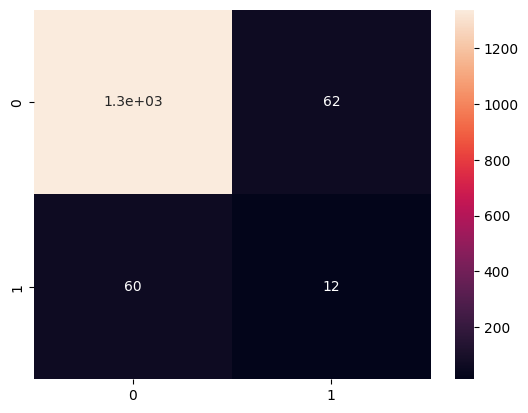

In [106]:
conf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf, annot = True)
plt.show

O XGBoost é uma das estruturas de aprendizado de máquina mais populares entre os cientistas de dados. De acordo com a Kaggle State of Data Science Survey 2021 , quase 50% dos entrevistados disseram que usaram o XGBoost, ficando abaixo apenas do TensorFlow e do Sklearn.

In [107]:
import xgboost as xgb

# Criando uma instância do modelo XGBoost

xgb_classifier = XGBClassifier()

In [108]:
# Treinando o modelo

xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
# Fazendo previsões

y_pred = xgb_classifier.predict(x_test)

Cria uma instância do modelo XGBClassifier da biblioteca XGBoost com alguns parâmetros especificados. Vamos analisar os parâmetros utilizados:

model = XGBClassifier(random_state=5, n_estimators=100, max_depth=15, learning_rate=1.0)

Aqui estão os significados dos parâmetros utilizados:

* random_state=5: O parâmetro random_state é usado para controlar a aleatoriedade do modelo. Definir um valor fixo para random_state garante que o modelo seja reproduzível, ou seja, executar o mesmo código várias vezes produzirá os mesmos resultados.

* n_estimators=100: O parâmetro n_estimators define o número de estimadores (árvores) que serão combinados para formar o modelo XGBoost. Neste caso, o modelo terá 100 estimadores.

* max_depth=15: O parâmetro max_depth define a profundidade máxima das árvores de decisão no modelo XGBoost. Limitar a profundidade das árvores pode ajudar a controlar a complexidade do modelo e evitar o overfitting. Neste caso, a profundidade máxima das árvores será 15.

* learning_rate=1.0: O parâmetro learning_rate (taxa de aprendizado) controla a taxa com que cada árvore contribui para a atualização do modelo. Um valor mais baixo indica uma contribuição mais conservadora, enquanto um valor mais alto indica uma contribuição mais agressiva. Neste caso, a taxa de aprendizado é definida como 1.0, o que significa uma contribuição mais agressiva.

Portanto, o modelo XGBClassifier criado possui 100 estimadores, cada árvore tem uma profundidade máxima de 15 e utiliza uma taxa de aprendizado de 1.0. Essas configurações podem ser ajustadas de acordo com as necessidades específicas do problema e os dados em que o modelo está sendo aplicado.

In [110]:
# Criando uma instância do modelo

model = XGBClassifier(random_state= 5, n_estimators= 100, max_depth= 15, learning_rate= 1.0)

In [111]:
# Treinando o modelo

model.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=5, ...)

In [112]:
model.feature_importances_

array([0.0437439 , 0.17818011, 0.09215486, 0.08860206, 0.11957187,
       0.1979425 , 0.0590618 , 0.03747104, 0.03451612, 0.14875577],
      dtype=float32)

In [113]:
# Fazendo previsões

y_pred_rf = model.predict(x_test)

In [114]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1401
           1       0.12      0.11      0.12        72

    accuracy                           0.92      1473
   macro avg       0.54      0.53      0.54      1473
weighted avg       0.91      0.92      0.92      1473



<function matplotlib.pyplot.show(close=None, block=None)>

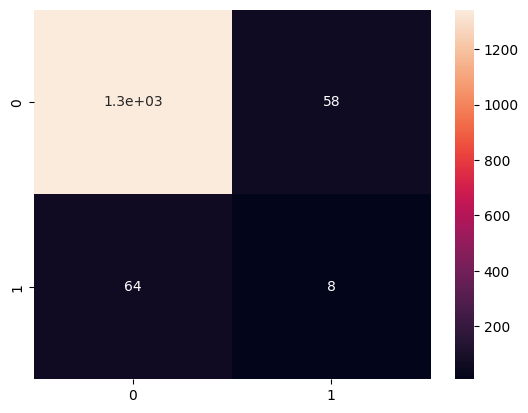

In [115]:
conf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf, annot = True)
plt.show

Cria uma instância do modelo SVC (Support Vector Classifier) da biblioteca scikit-learn. O SVC é um algoritmo de aprendizado de máquina supervisionado utilizado para classificação.

svc = SVC()

Neste caso, estamos criando uma instância do modelo SVC sem especificar quaisquer parâmetros. Isso significa que o modelo usará os valores padrão para os parâmetros.

Os parâmetros padrão do SVC podem variar dependendo da versão da biblioteca scikit-learn. No entanto, alguns parâmetros comuns incluem:

* C: Parâmetro de regularização. Controla o trade-off entre ajustar corretamente os dados de treinamento e ter uma superfície de decisão suave. Um valor maior de C implica em uma classificação mais precisa dos dados de treinamento, mas pode levar a uma superfície de decisão mais complexa.
* kernel: Define o tipo de função de kernel a ser usada. Alguns exemplos comuns são 'linear', 'poly', 'rbf' e 'sigmoid'.
* gamma: Parâmetro do kernel 'rbf', 'poly' e 'sigmoid'. Controla a influência dos exemplos de treinamento no modelo. Valores menores de gamma levam a um alcance de influência maior.
É recomendável ajustar os parâmetros do modelo SVC para obter o melhor desempenho em seu problema específico. Você pode fazer isso fornecendo valores personalizados para os parâmetros durante a criação da instância do modelo ou usando técnicas de busca de hiperparâmetros, como GridSearchCV, para encontrar a combinação ideal de parâmetros para o seu conjunto de dados.

In [116]:
# Criando uma instância do modelo

model = SVC(kernel= 'rbf', C= 1.0, gamma= 'scale', probability= True)


In [117]:
# Treinando o modelo

model.fit(x_train_smote, y_train_smote)

SVC(probability=True)

In [118]:
# Fazendo previsões

y_pred_svc = model.predict(x_test)

In [119]:
accuracy_score(y_test, y_pred_svc)

0.7725729803122878

In [120]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1401
           1       0.10      0.46      0.16        72

    accuracy                           0.77      1473
   macro avg       0.53      0.62      0.52      1473
weighted avg       0.92      0.77      0.83      1473



In [121]:
pd.crosstab(y_test, y_pred_svc)

col_0,0,1
stroke,,
0,1105,296
1,39,33


<function matplotlib.pyplot.show(close=None, block=None)>

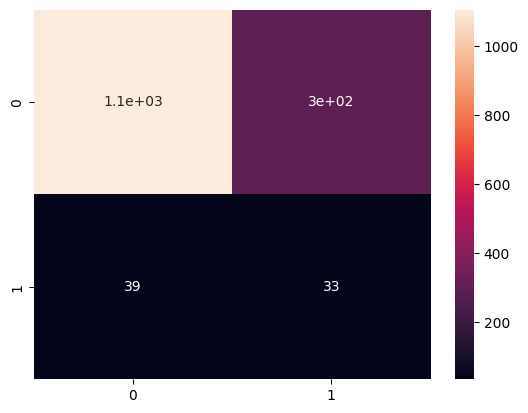

In [122]:
conf = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf, annot = True)
plt.show

In [123]:
confusion_matrix(y_test, y_pred_svc)

array([[1105,  296],
       [  39,   33]])

 Importa as classes GridSearchCV e RandomizedSearchCV da biblioteca sklearn.model_selection. Essas classes são utilizadas para realizar a busca de hiperparâmetros (hyperparameter tuning) em modelos de aprendizado de máquina.

A busca de hiperparâmetros é um processo para encontrar a combinação ideal de valores de hiperparâmetros que resulta no melhor desempenho do modelo. Isso é feito através da avaliação sistemática de diferentes combinações de valores de hiperparâmetros e medindo o desempenho do modelo em uma métrica de avaliação, como acurácia, precisão ou recall.

* GridSearchCV: Essa classe implementa uma busca exaustiva sobre uma grade de hiperparâmetros especificados. Ela recebe um estimador (modelo), uma grade de hiperparâmetros e uma métrica de avaliação como entrada, e realiza uma validação cruzada para avaliar o desempenho do modelo em cada combinação de hiperparâmetros.

* RandomizedSearchCV: Essa classe implementa uma busca aleatória sobre um espaço de hiperparâmetros especificado. Ela recebe um estimador (modelo), uma distribuição de hiperparâmetros e uma métrica de avaliação como entrada, e amostra aleatoriamente combinações de hiperparâmetros do espaço especificado. Em seguida, ela realiza uma validação cruzada para avaliar o desempenho do modelo em cada combinação.

Essas classes são muito úteis para encontrar a combinação ideal de hiperparâmetros, especialmente quando o espaço de busca é grande e é impraticável avaliar todas as combinações possíveis. Elas automatizam o processo de busca de hiperparâmetros e fornecem a melhor combinação encontrada, juntamente com o desempenho do modelo correspondente.

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Hiperparâmetros que podem ser usados na busca de hiperparâmetros. Essa grade define diferentes valores para os parâmetros n_estimators, criterion, max_features e random_state. Aqui está a definição dos parâmetros:

params = {
    'n_estimators': [10, 20, 50, 70, 80, 100, 120],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 5, 7, 10, 15],
    'random_state': range(0, 10)
}

* n_estimators: Uma lista de valores que define o número de estimadores (árvores) no modelo. Esses valores serão testados durante a busca de hiperparâmetros.

* criterion: Uma lista de valores que define o critério de divisão usado para construir as árvores de decisão. Os dois critérios disponíveis são "entropy" (entropia) e "gini". Ambos serão testados durante a busca de hiperparâmetros.

* max_features: Uma lista de valores que define o número máximo de características a serem consideradas em cada divisão. Os valores possíveis incluem "auto" (todas as características), números inteiros que representam a quantidade de características e números float que representam a proporção de características. Esses valores serão testados durante a busca de hiperparâmetros.

* random_state: Uma faixa de valores que define o estado aleatório do modelo. Serão testados valores de 0 a 9 durante a busca de hiperparâmetros.

Esses são apenas exemplos de valores para os parâmetros. Você pode ajustar essa grade de acordo com as necessidades do seu problema e a faixa de valores que deseja testar durante a busca de hiperparâmetros.

In [125]:
params = {
    'n_estimators': [10, 20, 50, 70, 80, 100, 120],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 5, 7, 10, 15],
    'random_state': range(0, 10)
}

In [126]:
# Atribuir o parametro ao modelo

# Criando uma instância do modelo

model_cv = RandomizedSearchCV(RandomForestClassifier(), params)

In [127]:
# Treinando o modelo

model_cv.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 5, 7, 10, 15],
                                        'n_estimators': [10, 20, 50, 70, 80,
                                                         100, 120],
                                        'random_state': range(0, 10)})

In [128]:
# Visualisar o melhor parametro

model_cv.best_params_

{'random_state': 2,
 'n_estimators': 100,
 'max_features': 'auto',
 'criterion': 'gini'}

In [129]:
# Visualisar o melhor parametro

model_cv.best_estimator_

RandomForestClassifier(max_features='auto', random_state=2)

In [130]:
model_cv.best_score_

0.9712047694534428

In [131]:
# Fazendo previsões

y_pred_grid = model_cv.predict(x_test)

In [132]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1401
           1       0.15      0.08      0.11        72

    accuracy                           0.93      1473
   macro avg       0.55      0.53      0.54      1473
weighted avg       0.91      0.93      0.92      1473



In [133]:
pd.crosstab(y_test, y_pred_grid)

col_0,0,1
stroke,,
0,1367,34
1,66,6


<function matplotlib.pyplot.show(close=None, block=None)>

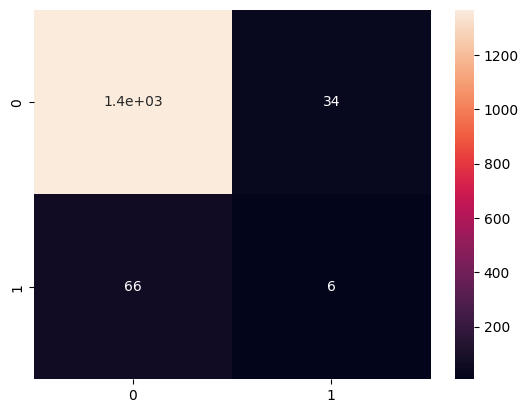

In [134]:
conf = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(conf, annot = True)
plt.show

A importação das funções `roc_curve` e `roc_auc_score` da biblioteca `sklearn.metrics` permite realizar a avaliação do desempenho de um modelo de classificação em termos da curva ROC (Receiver Operating Characteristic) e da área sob a curva ROC (AUC-ROC).

- `roc_curve`: Essa função é usada para calcular os valores da taxa de falsos positivos (FPR), taxa de verdadeiros positivos (TPR) e os respectivos limiares para diferentes pontos de corte no classificador. Ela recebe como entrada as verdadeiras classes (rótulos) dos dados e as probabilidades previstas pelo modelo para a classe positiva. A função retorna três arrays: FPR, TPR e limiares.

- `roc_auc_score`: Essa função calcula a área sob a curva ROC (AUC-ROC) para avaliar o desempenho do modelo de classificação. Ela recebe as verdadeiras classes dos dados e as probabilidades previstas pelo modelo para a classe positiva. A função retorna o valor numérico da AUC-ROC, que varia entre 0 e 1. Quanto maior o valor, melhor o desempenho do modelo.

A curva ROC é um gráfico que representa a taxa de verdadeiros positivos em função da taxa de falsos positivos em diferentes pontos de corte do classificador. A AUC-ROC é uma métrica resumida que fornece uma medida do desempenho global do modelo em toda a faixa de pontos de corte.

Essas funções são úteis para avaliar o desempenho de um modelo de classificação, especialmente em problemas de classificação binária. Elas fornecem informações sobre a capacidade do modelo em discriminar entre as classes positiva e negativa e podem ajudar na seleção do ponto de corte ideal para a classificação.

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score

Criar um objeto DataFrame a partir das probabilidades previstas pelo modelo para a classe positiva. Vamos analisar o código passo a passo:

```python
pd.DataFrame(model.predict_proba(X_test))
```

Aqui, `model` é o objeto do modelo que você treinou e `X_test` são os dados de teste nos quais você deseja fazer previsões de probabilidade. A função `predict_proba` retorna as probabilidades previstas pelo modelo para cada classe. No caso de um problema de classificação binária, o resultado será um array com duas colunas, representando as probabilidades para a classe negativa (coluna 0) e a classe positiva (coluna 1).

Ao passar o resultado para `pd.DataFrame()`, você está criando um objeto DataFrame a partir dessas probabilidades previstas. O DataFrame terá duas colunas, uma para cada classe.

```python
.iloc[:,1]
```

O método `.iloc` é usado para acessar as colunas do DataFrame por índices. Nesse caso, `[:,1]` significa que estamos selecionando todas as linhas (`:`) e a segunda coluna (`1`) do DataFrame. Assumindo que a segunda coluna corresponde às probabilidades previstas para a classe positiva, esse trecho do código retornará uma série contendo apenas as probabilidades previstas para a classe positiva.

Em resumo, o código apresentado cria um objeto DataFrame com as probabilidades previstas pelo modelo para ambas as classes e, em seguida, retorna apenas as probabilidades previstas para a classe positiva. Isso pode ser útil para realizar análises adicionais ou para comparar as probabilidades previstas com os rótulos verdadeiros dos dados de teste.

In [136]:
pd.DataFrame(model.predict_proba(x_test)).iloc[:,1]

0       0.466288
1       0.397664
2       0.448883
3       0.000301
4       0.030398
          ...   
1468    0.090050
1469    0.011554
1470    0.921568
1471    0.041782
1472    0.595927
Name: 1, Length: 1473, dtype: float64

In [137]:
y_pred_prob = model.predict_proba(x_test)[:,1]
print(y_pred_prob)

[0.46628777 0.39766386 0.44888318 ... 0.92156815 0.04178166 0.59592683]


In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [139]:
tpr

array([0.        , 0.01388889, 0.04166667, 0.04166667, 0.05555556,
       0.05555556, 0.06944444, 0.06944444, 0.08333333, 0.08333333,
       0.09722222, 0.09722222, 0.11111111, 0.11111111, 0.13888889,
       0.13888889, 0.15277778, 0.15277778, 0.16666667, 0.16666667,
       0.18055556, 0.18055556, 0.19444444, 0.19444444, 0.20833333,
       0.20833333, 0.22222222, 0.22222222, 0.23611111, 0.23611111,
       0.25      , 0.25      , 0.27777778, 0.27777778, 0.30555556,
       0.30555556, 0.31944444, 0.31944444, 0.33333333, 0.33333333,
       0.34722222, 0.34722222, 0.36111111, 0.36111111, 0.375     ,
       0.375     , 0.38888889, 0.38888889, 0.40277778, 0.40277778,
       0.44444444, 0.45833333, 0.45833333, 0.48611111, 0.48611111,
       0.5       , 0.5       , 0.51388889, 0.51388889, 0.52777778,
       0.52777778, 0.54166667, 0.54166667, 0.55555556, 0.55555556,
       0.56944444, 0.56944444, 0.58333333, 0.58333333, 0.59722222,
       0.59722222, 0.61111111, 0.61111111, 0.625     , 0.625  

In [140]:
fpr

array([0.        , 0.        , 0.        , 0.00785153, 0.00785153,
       0.00999286, 0.00999286, 0.01356174, 0.01356174, 0.01427552,
       0.01427552, 0.01998572, 0.01998572, 0.0206995 , 0.0206995 ,
       0.02498216, 0.02498216, 0.02640971, 0.02640971, 0.02712348,
       0.02712348, 0.04568166, 0.04568166, 0.04996431, 0.04996431,
       0.05139186, 0.05139186, 0.06638116, 0.06638116, 0.08708066,
       0.08708066, 0.08850821, 0.08850821, 0.12276945, 0.12276945,
       0.13704497, 0.13704497, 0.14061385, 0.14061385, 0.14703783,
       0.14703783, 0.15060671, 0.15060671, 0.15774447, 0.15774447,
       0.16845111, 0.16845111, 0.17416131, 0.17416131, 0.17773019,
       0.17987152, 0.17987152, 0.21270521, 0.21270521, 0.21484654,
       0.21484654, 0.22412562, 0.22412562, 0.23411849, 0.23411849,
       0.23625981, 0.23625981, 0.2426838 , 0.2426838 , 0.25410421,
       0.25410421, 0.26052819, 0.26052819, 0.2633833 , 0.2633833 ,
       0.28051392, 0.28051392, 0.29693076, 0.29693076, 0.30478

In [141]:
thresholds

array([1.98870689e+00, 9.88706890e-01, 9.85747951e-01, 9.61882920e-01,
       9.60459486e-01, 9.50396009e-01, 9.43620912e-01, 9.36673199e-01,
       9.36439496e-01, 9.35054476e-01, 9.34793977e-01, 9.14001667e-01,
       9.07789789e-01, 9.07586117e-01, 9.06335924e-01, 8.97959496e-01,
       8.95511528e-01, 8.91730089e-01, 8.90413086e-01, 8.90246123e-01,
       8.88338291e-01, 8.58639810e-01, 8.57746694e-01, 8.49731017e-01,
       8.48076772e-01, 8.44276957e-01, 8.42174247e-01, 8.16459957e-01,
       8.16370883e-01, 7.62635317e-01, 7.61128987e-01, 7.59943360e-01,
       7.55509178e-01, 6.75684035e-01, 6.74022963e-01, 6.34402895e-01,
       6.31714438e-01, 6.19567114e-01, 6.18346583e-01, 5.95926833e-01,
       5.95831975e-01, 5.85976508e-01, 5.76941293e-01, 5.65746036e-01,
       5.62239565e-01, 5.36963074e-01, 5.31611345e-01, 5.11503727e-01,
       5.09877514e-01, 5.05564375e-01, 5.00000000e-01, 4.93251645e-01,
       3.83696706e-01, 3.82073375e-01, 3.76502220e-01, 3.75214021e-01,
      

In [142]:
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
auc

0.7601366087715125

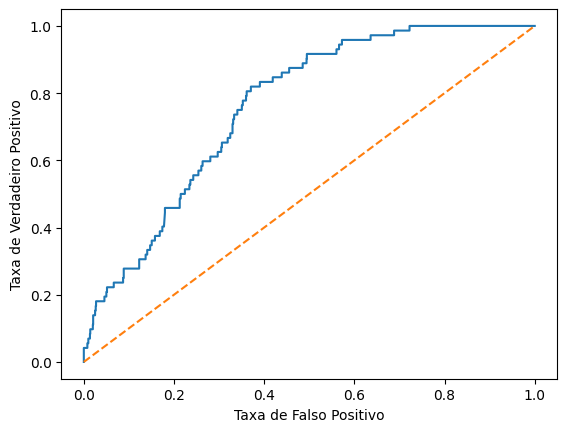

In [143]:
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.plot([0,1], [0,1], '--')
plt.show()

In [144]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [145]:
input_data = (1, 69.0, 1, 1, 1, 2, 1, 328.69, 36.6, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_cv.predict(input_data_reshaped)
print(prediction)


if (prediction[0] ==0):
    print('Paciente não apresenta tendência para ter AVC')
else:
    print('Paciente pode ter AVC')

[0]
Paciente não apresenta tendência para ter AVC
